# 11: Injection Bump

In [26]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [27]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

In [28]:
def round_sig(x, sig=3):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [3]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [4]:
dd1 = dict()
dd2 = dict()
dd3 = dict()
dd4 = dict()

dd1 = add_input_file(dd1, '01_NoSC_LIU_BCMS/PyORBIT/output/output.mat', 'BCMS')
dd1 = add_input_file(dd1, '01_NoSC_LIU_Standard/PyORBIT/output/output.mat', 'Standard')
dd1 = add_input_file(dd1, '01_NoSC_LIU_Standard_2021/PyORBIT/output/output.mat', 'Standard 2021')
dd1 = add_input_file(dd1, '01_NoSC_LIU_Standard_2022/PyORBIT/output/output.mat', 'Standard 2022')
dd1 = add_input_file(dd1, '01_NoSC_LIU_Standard_2023/PyORBIT/output/output.mat', 'Standard 2023')

dd2 = add_input_file(dd2, '02_SC_LIU_BCMS/PyORBIT/output/output.mat', 'BCMS')
dd2 = add_input_file(dd2, '02_SC_LIU_Standard/PyORBIT/output/output.mat', 'Standard')
dd2 = add_input_file(dd2, '02_SC_LIU_Standard_2021/PyORBIT/output/output.mat', 'Standard 2021')
dd2 = add_input_file(dd2, '02_SC_LIU_Standard_2022/PyORBIT/output/output.mat', 'Standard 2022')
dd2 = add_input_file(dd2, '02_SC_LIU_Standard_2023/PyORBIT/output/output.mat', 'Standard 2023')

dd3 = add_input_file(dd3, '01_NoSC_PreLIU_BCMS/PyORBIT/output/output.mat', 'BCMS')
dd3 = add_input_file(dd3, '01_NoSC_PreLIU_Standard/PyORBIT/output/output.mat', 'Standard')

dd4 = add_input_file(dd4, '02_SC_PreLIU_Standard/PyORBIT/output/output.mat', 'Standard')
dd4 = add_input_file(dd4, '02_SC_PreLIU_BCMS/PyORBIT/output/output.mat', 'BCMS')

	Added output data from  01_NoSC_LIU_BCMS/PyORBIT/output/output.mat 	 dictionary key:  BCMS
	Added output data from  01_NoSC_LIU_Standard/PyORBIT/output/output.mat 	 dictionary key:  Standard
	Added output data from  01_NoSC_LIU_Standard_2021/PyORBIT/output/output.mat 	 dictionary key:  Standard 2021
	Added output data from  01_NoSC_LIU_Standard_2022/PyORBIT/output/output.mat 	 dictionary key:  Standard 2022
	Added output data from  01_NoSC_LIU_Standard_2023/PyORBIT/output/output.mat 	 dictionary key:  Standard 2023
	Added output data from  02_SC_LIU_BCMS/PyORBIT/output/output.mat 	 dictionary key:  BCMS
	Added output data from  02_SC_LIU_Standard/PyORBIT/output/output.mat 	 dictionary key:  Standard
	Added output data from  02_SC_LIU_Standard_2021/PyORBIT/output/output.mat 	 dictionary key:  Standard 2021
	Added output data from  02_SC_LIU_Standard_2022/PyORBIT/output/output.mat 	 dictionary key:  Standard 2022
	Added output data from  02_SC_LIU_Standard_2023/PyORBIT/output/output.mat

In [5]:
dd1['BCMS'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'orbit_x_max',
 'turn_time',
 'n_mp',
 'min_xp',
 'orbit_x_min',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'kurtosis_xp',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'mu_z',
 'min_z',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'Qy',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'Qx',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'min_y',
 'mean_xp',
 'mu_y',
 'kurtosis_dE',
 'orbit_y_max',
 'orbit_y_min',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

In [6]:
sc = 'SbS'
legend_label = ''    
main_label = 'Injection_Bump'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 30
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
#betagamma = 2.492104532 * 0.9159915293879255
save_folder = 'Plots'
case_label_1 = 'LIU'
case_label_2 = 'PreLIU'

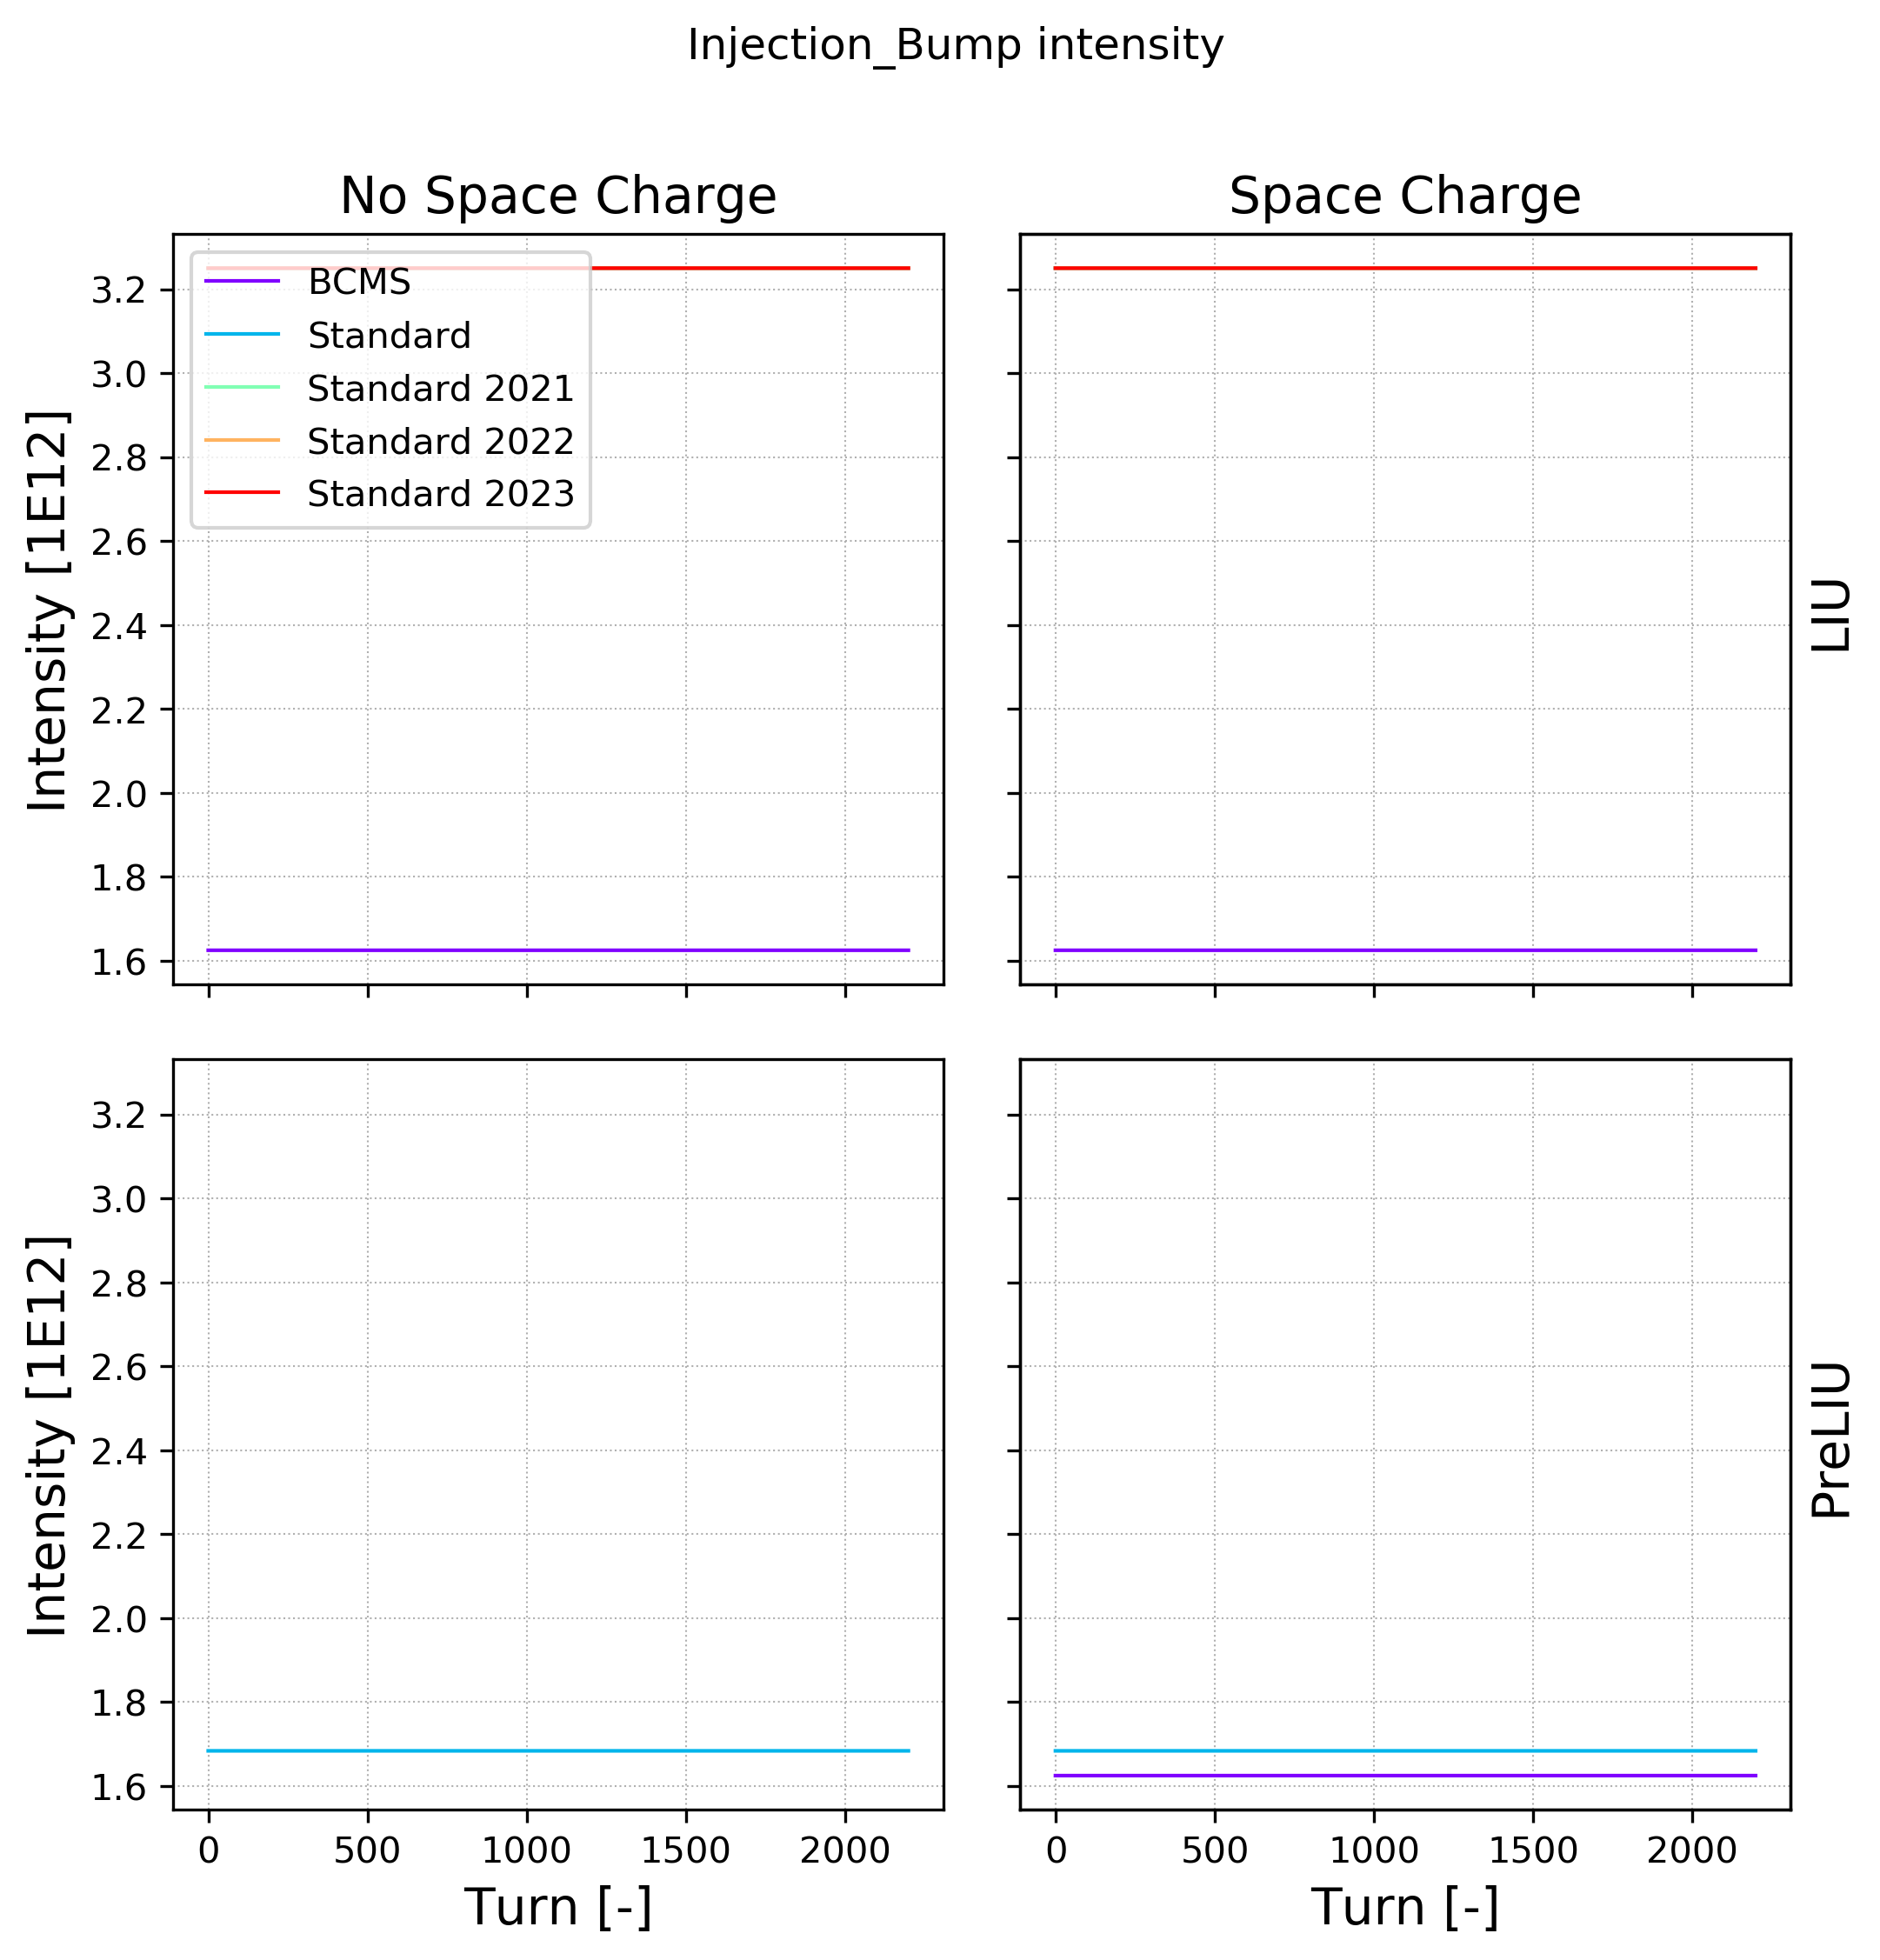

In [7]:
parameter = 'intensity'
multi1 = 1E-12

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Intensity [1E12]');
ax3.set_ylabel('Intensity [1E12]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

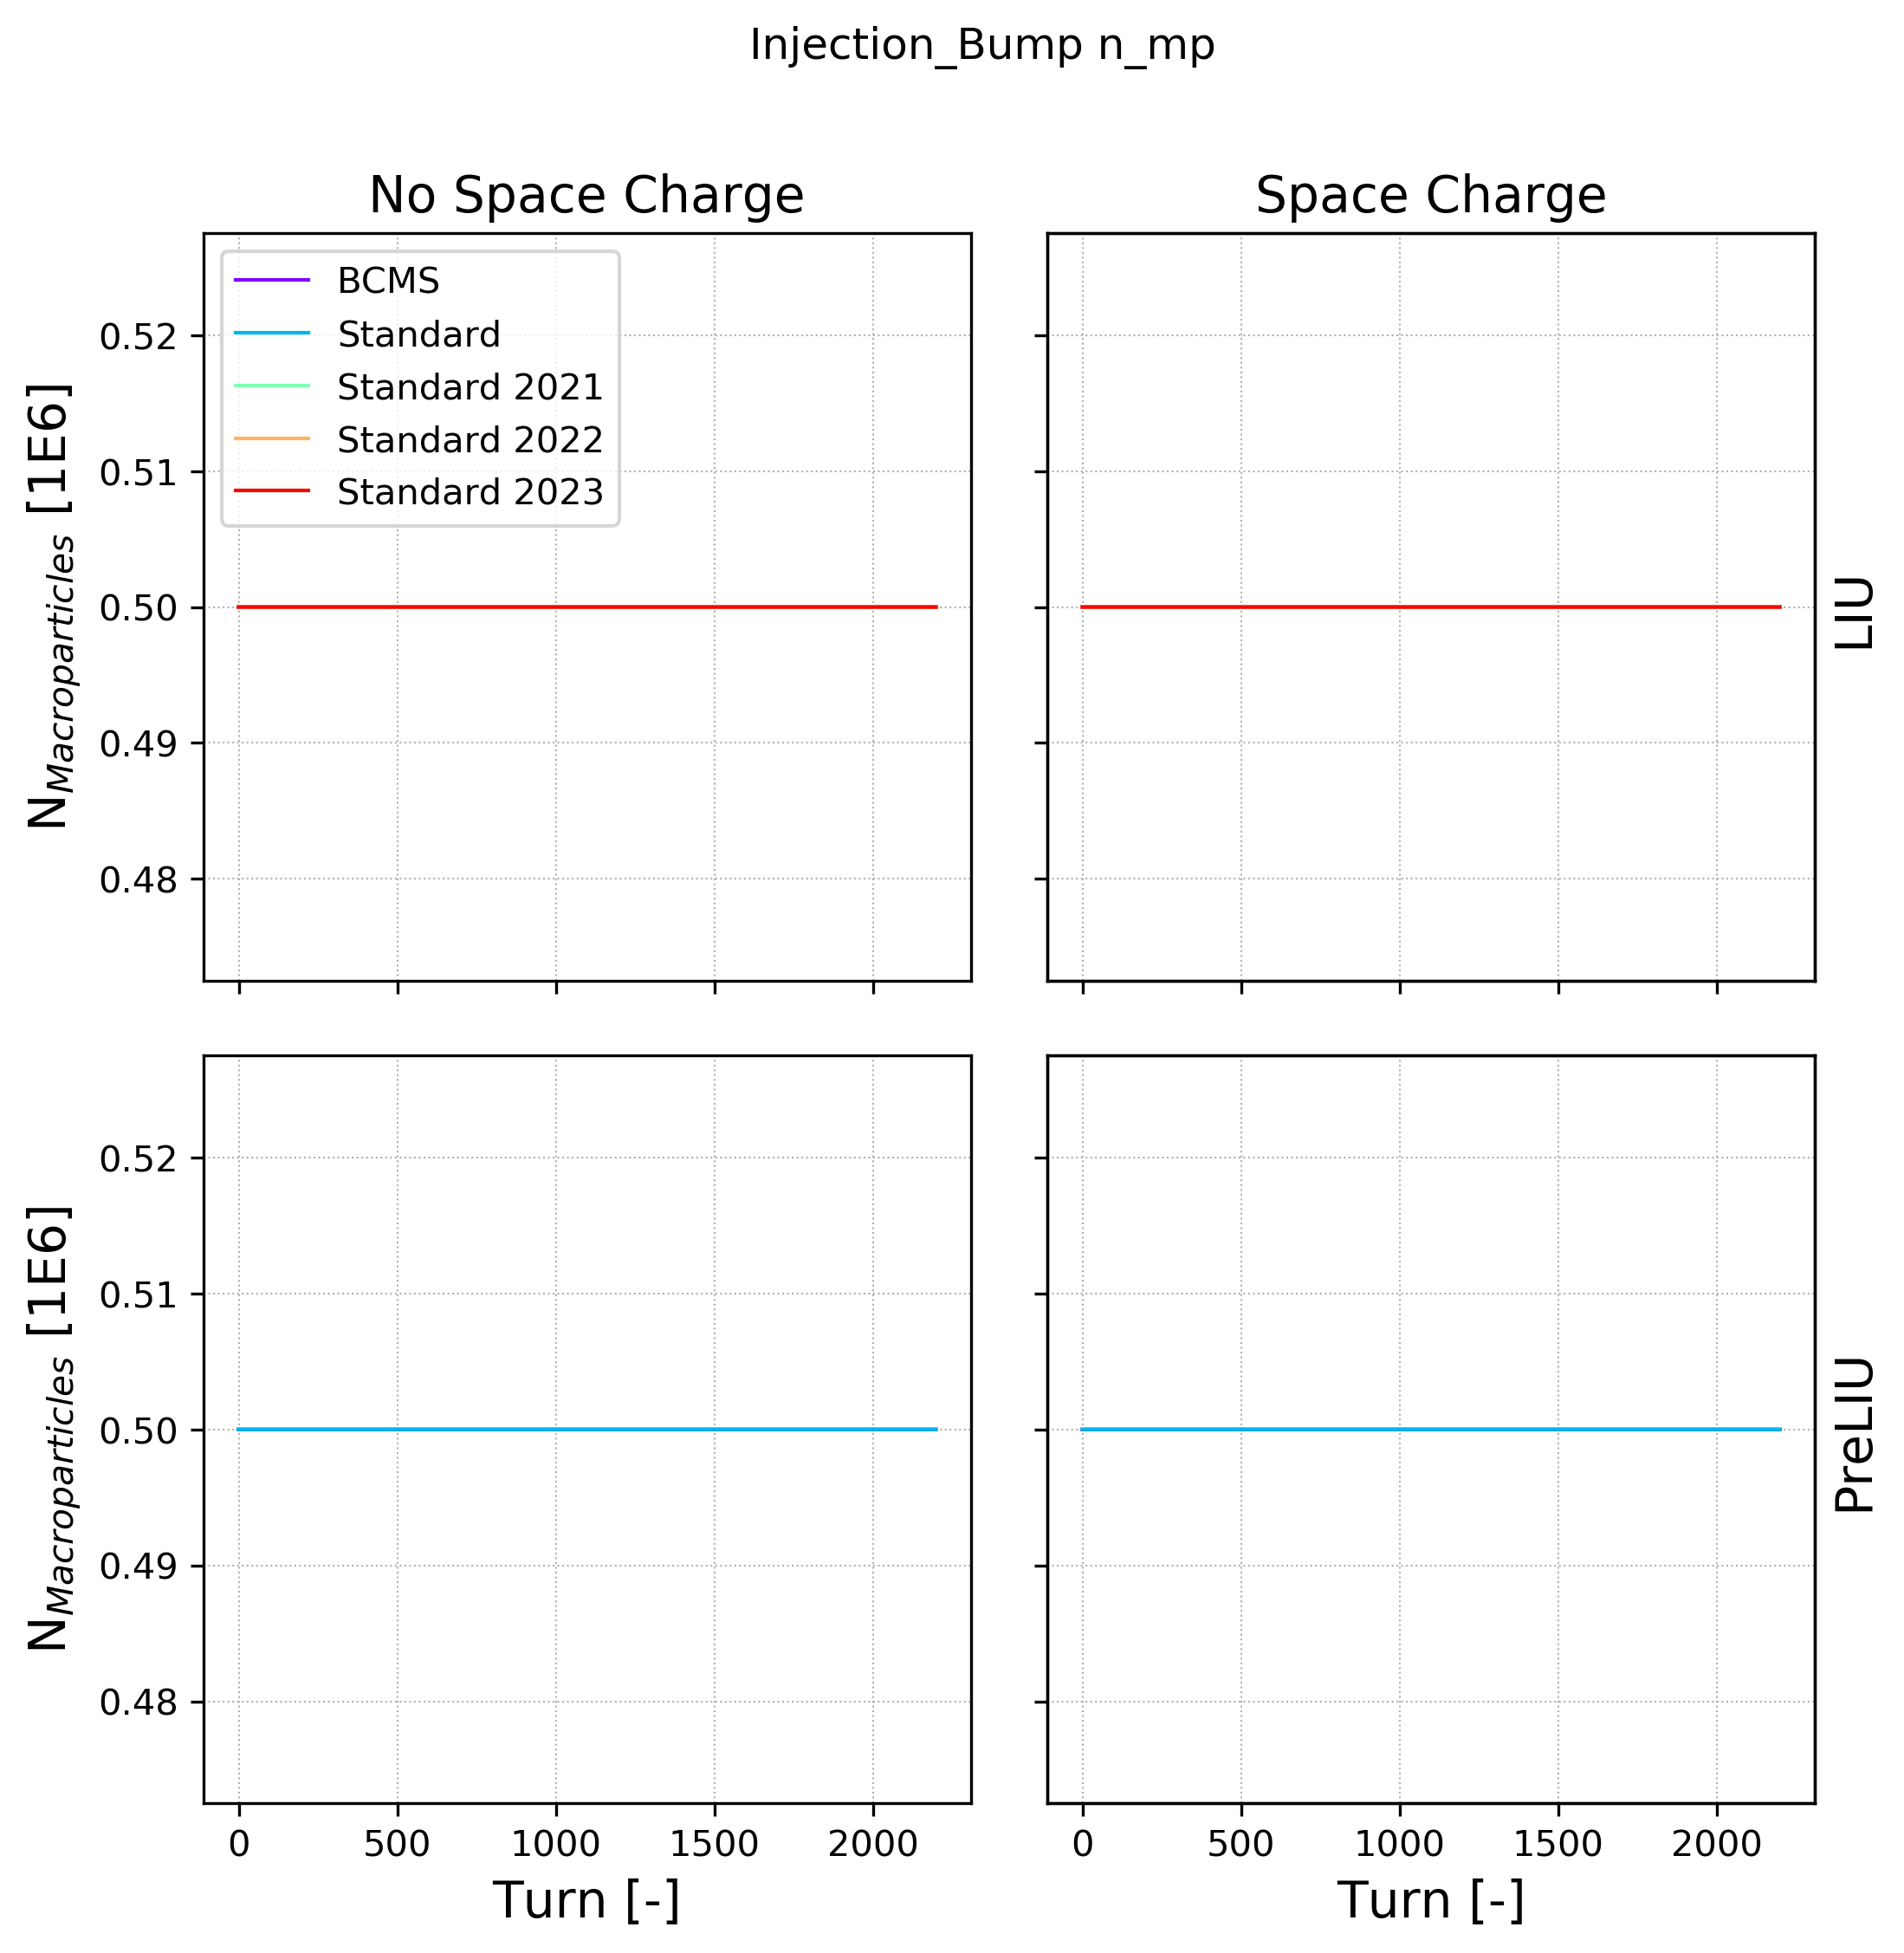

In [8]:
parameter = 'n_mp'
multi1 = 1E-6

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax3.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

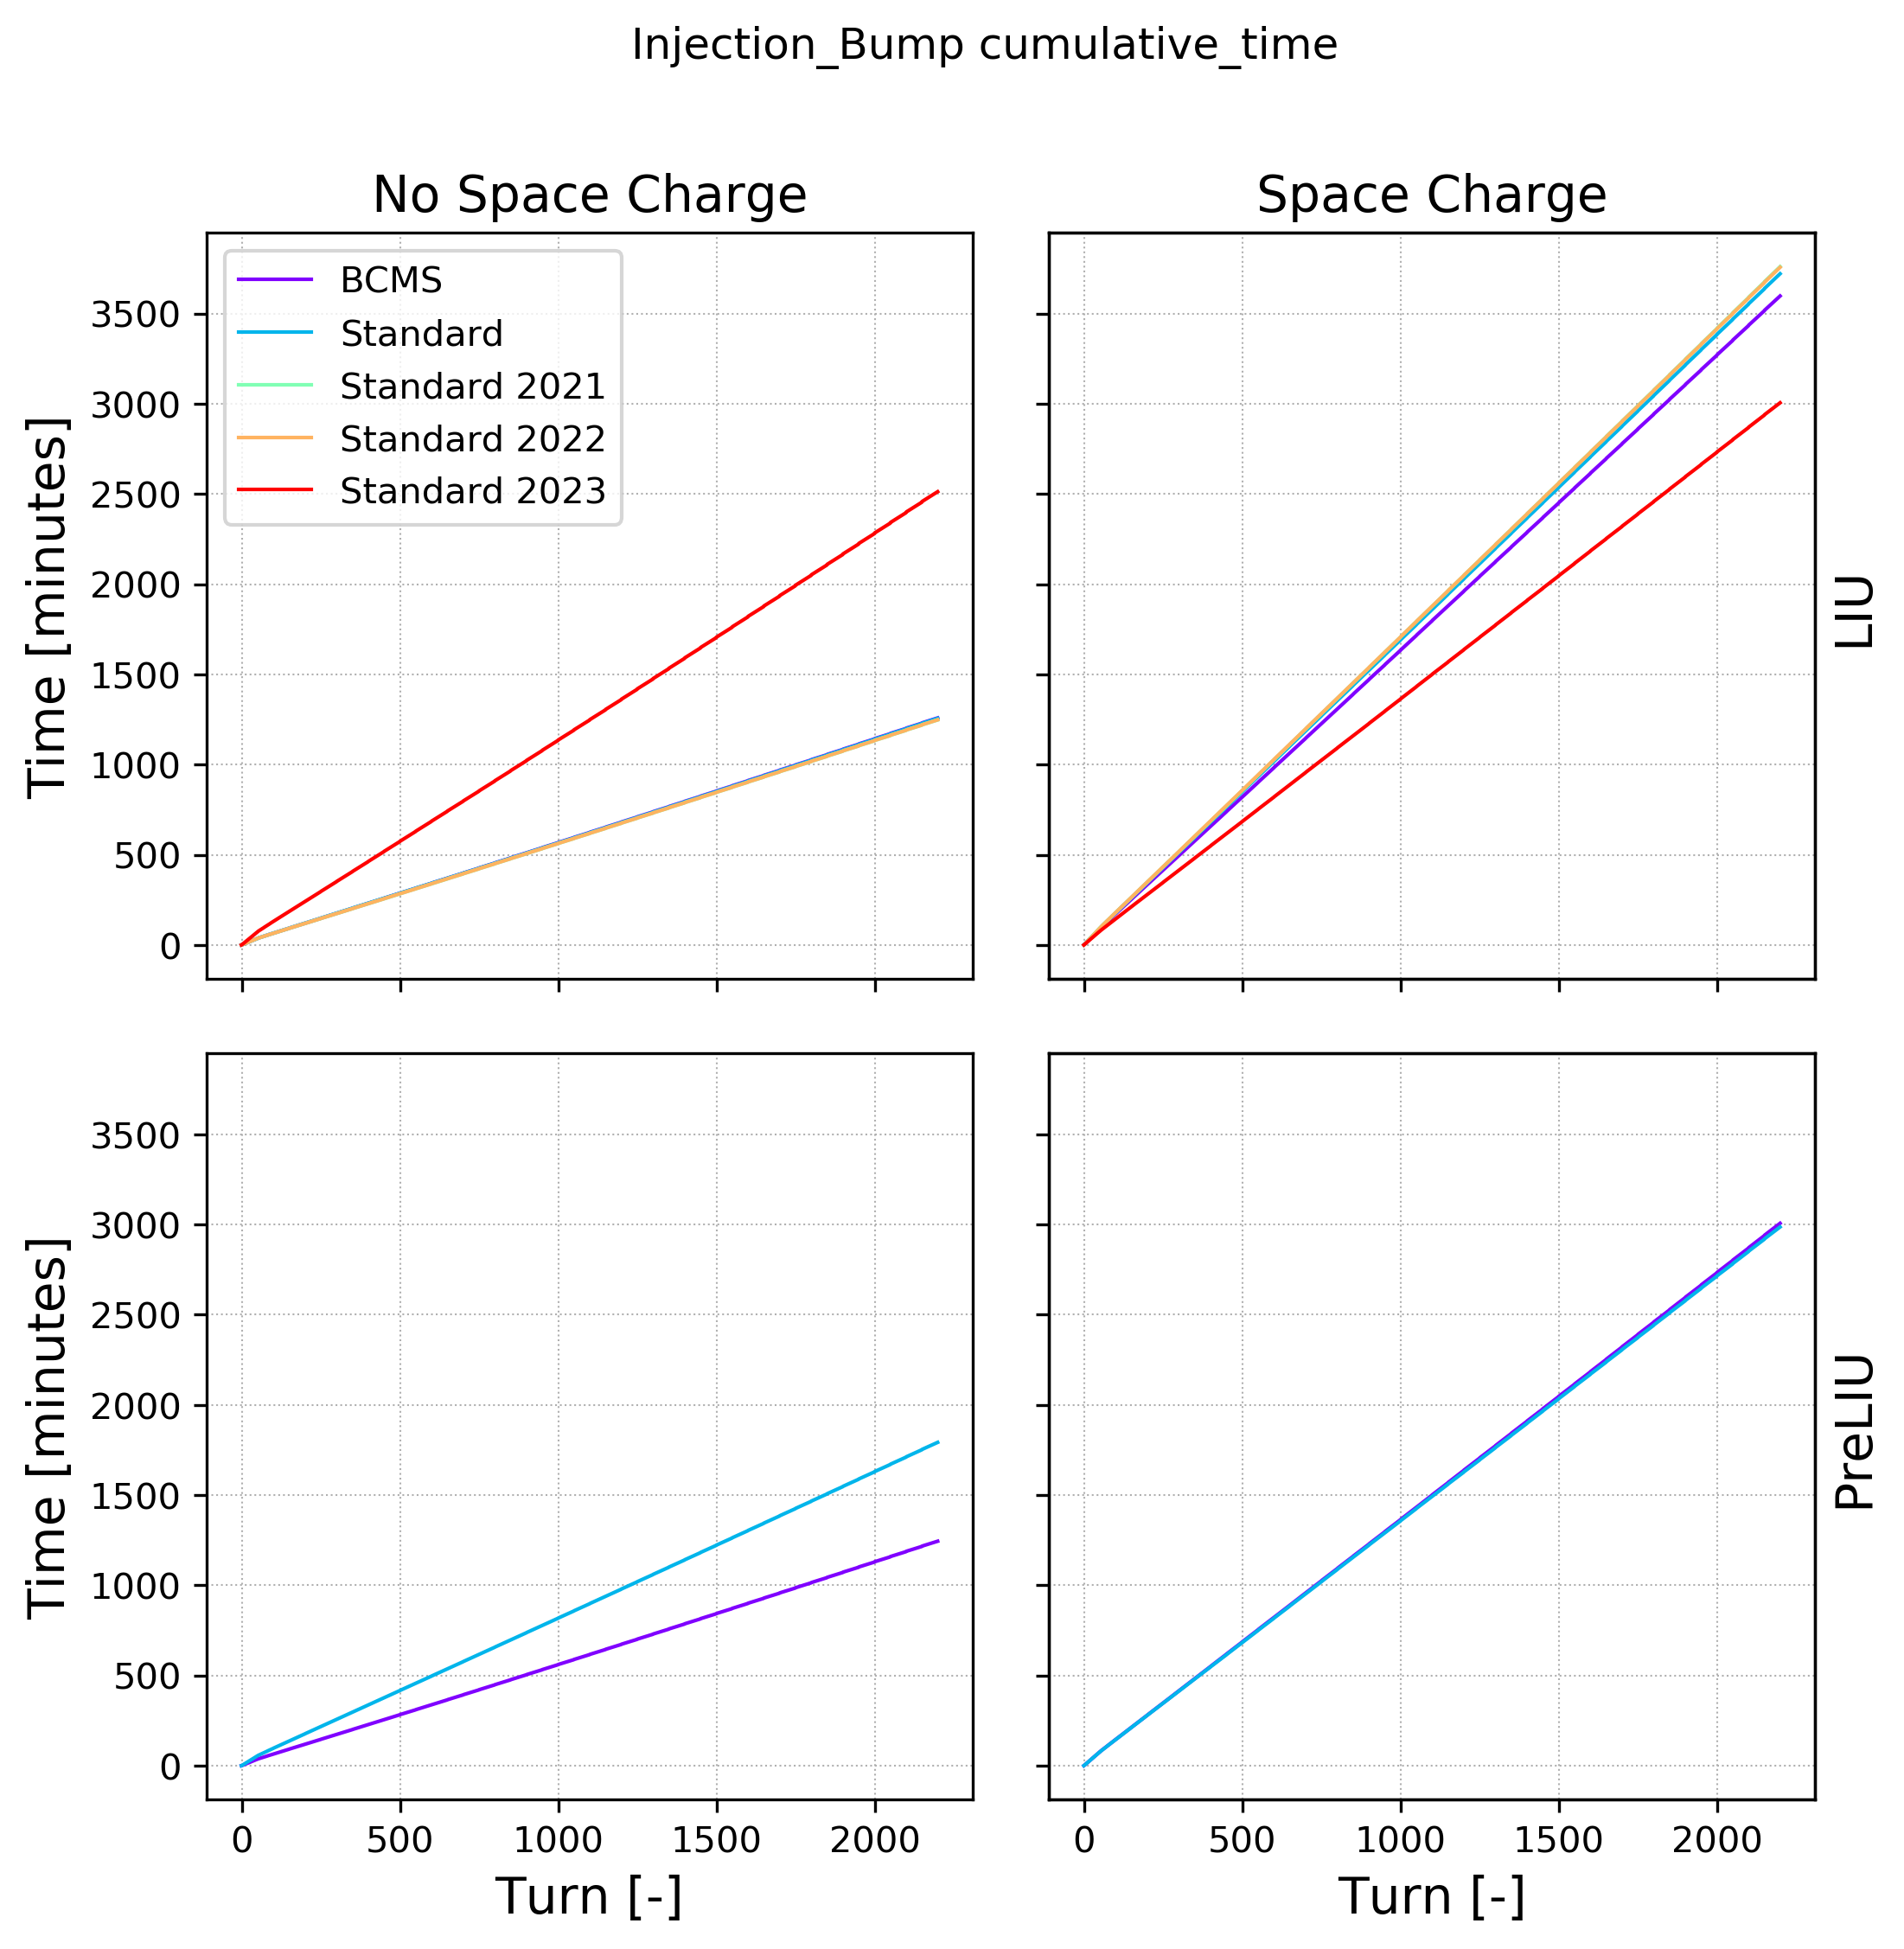

In [9]:
parameter = 'cumulative_time'
multi1 = 1./60.

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Time [minutes]');
ax3.set_ylabel('Time [minutes]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

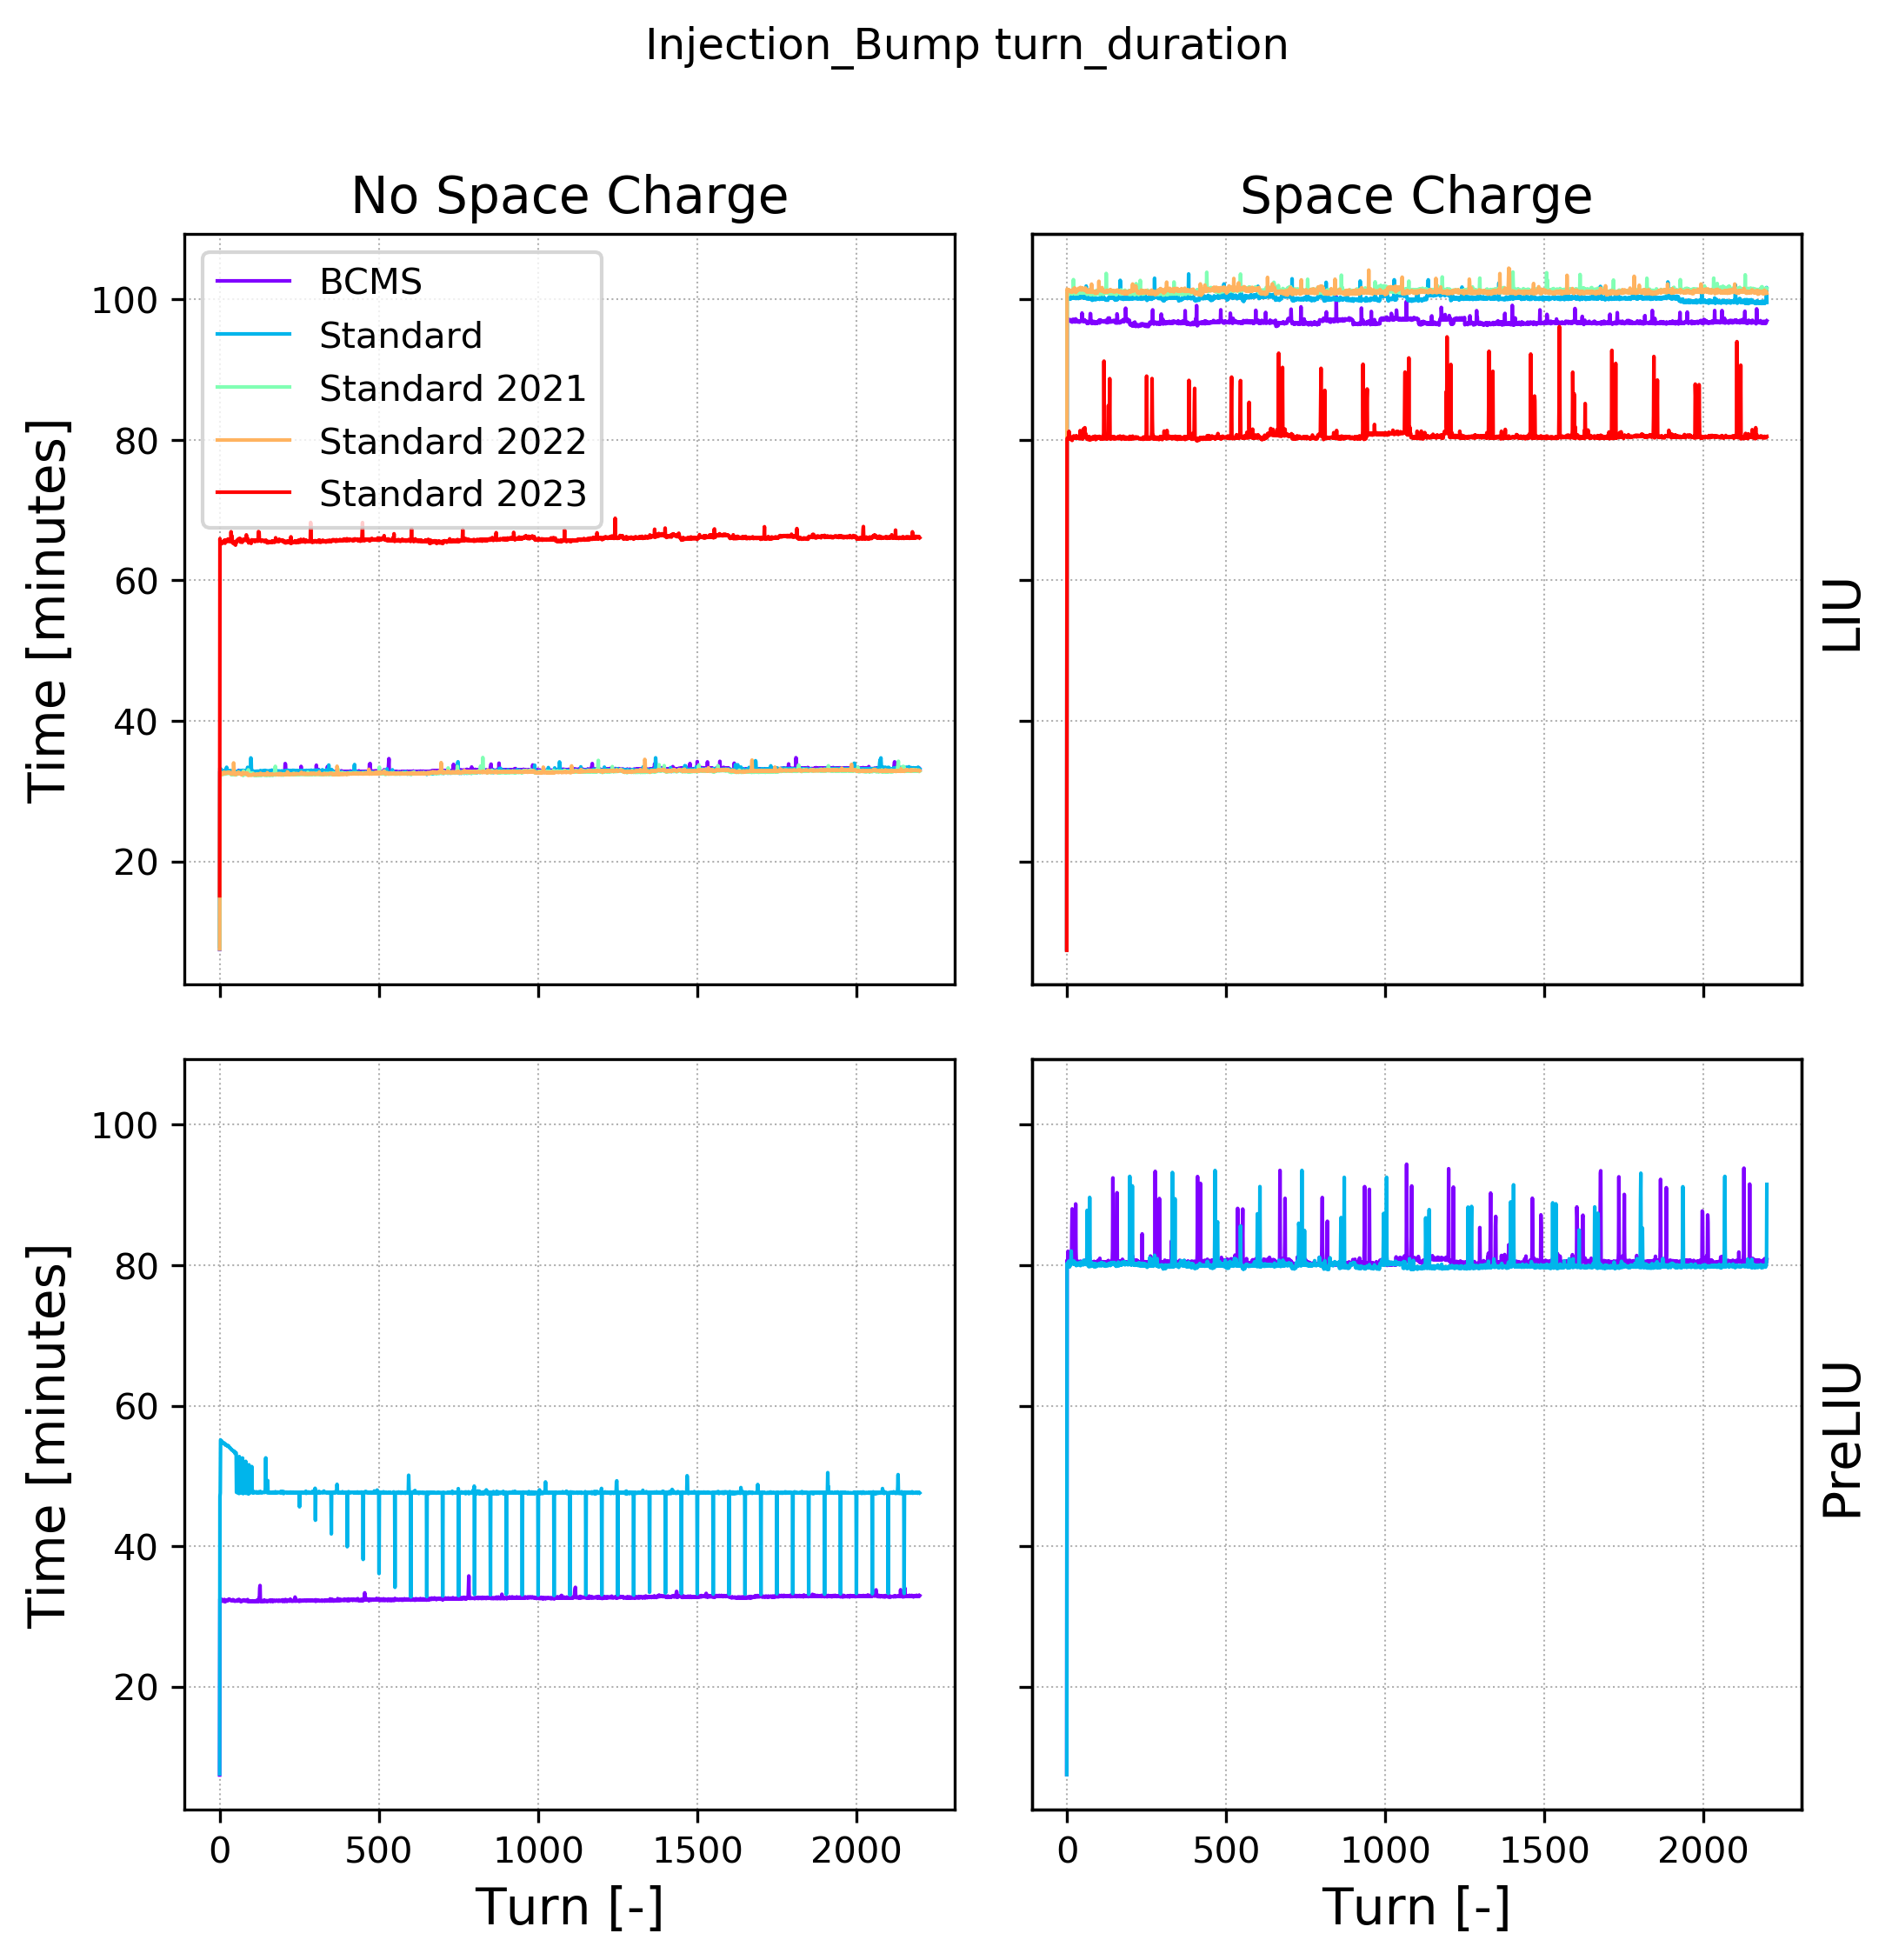

In [10]:
parameter = 'turn_duration'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Time [minutes]');
ax3.set_ylabel('Time [minutes]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

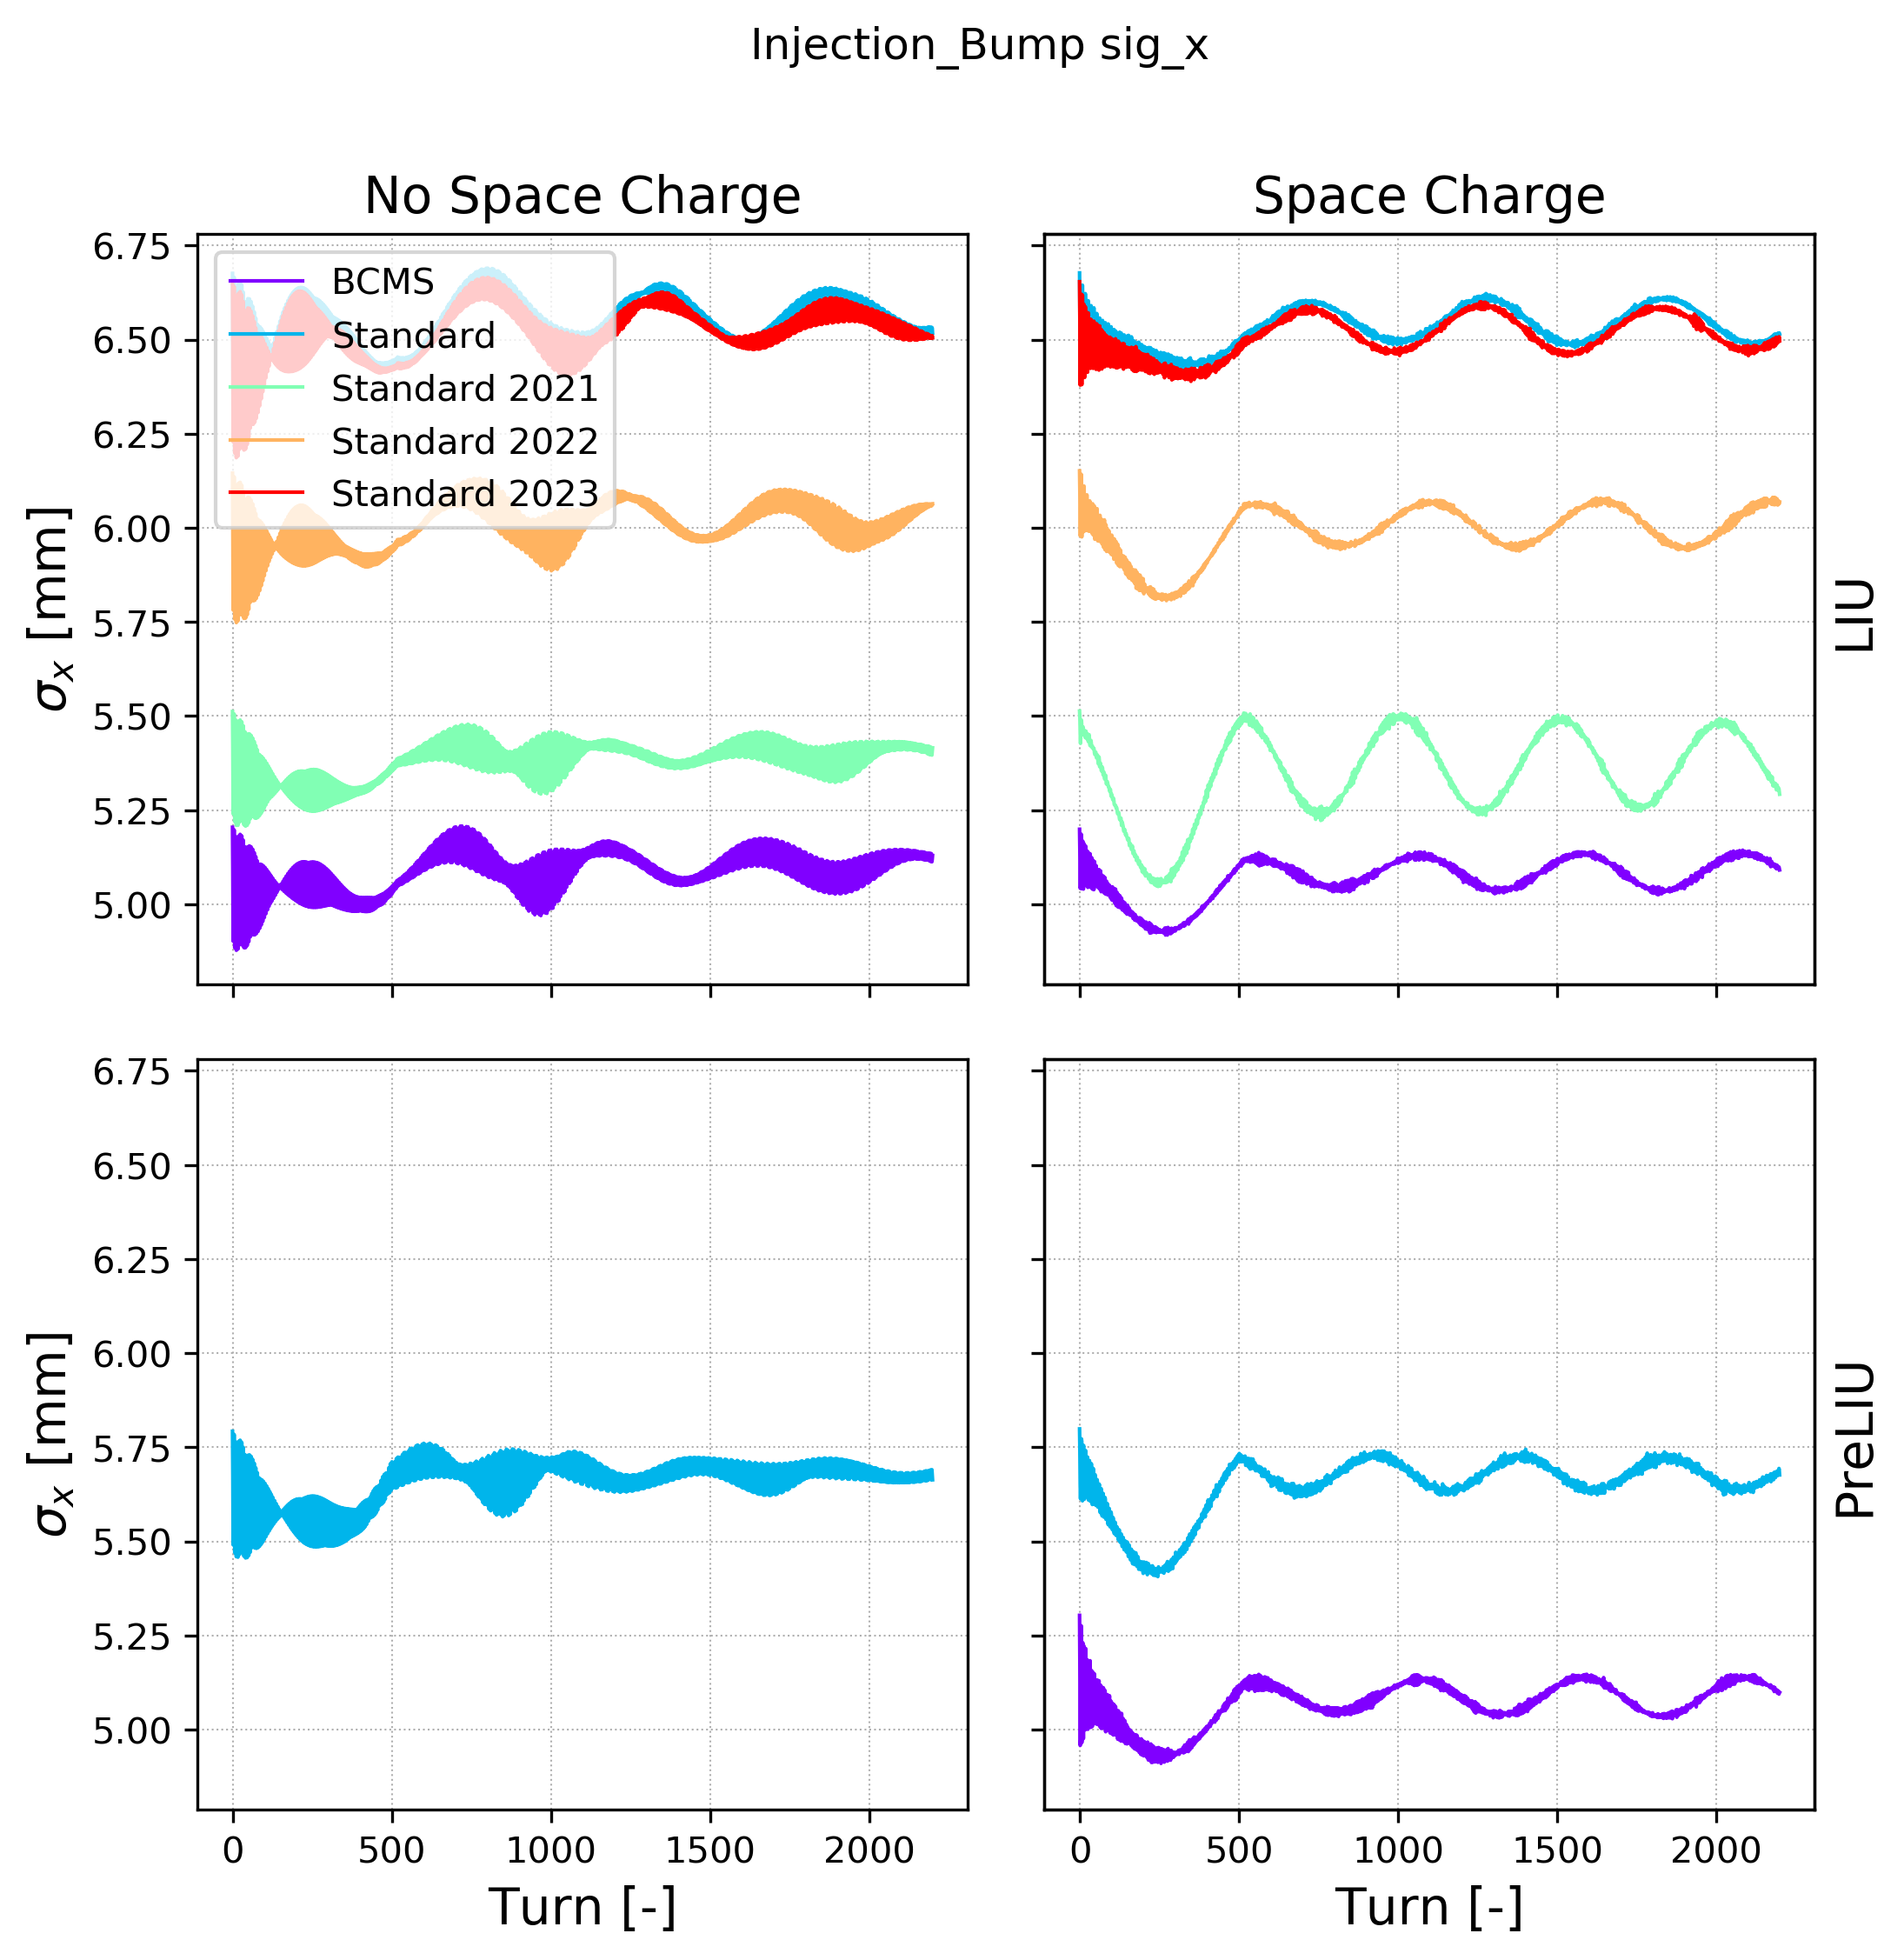

In [11]:
parameter = 'sig_x'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax3.set_ylabel(r'$\sigma_x$ [mm]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

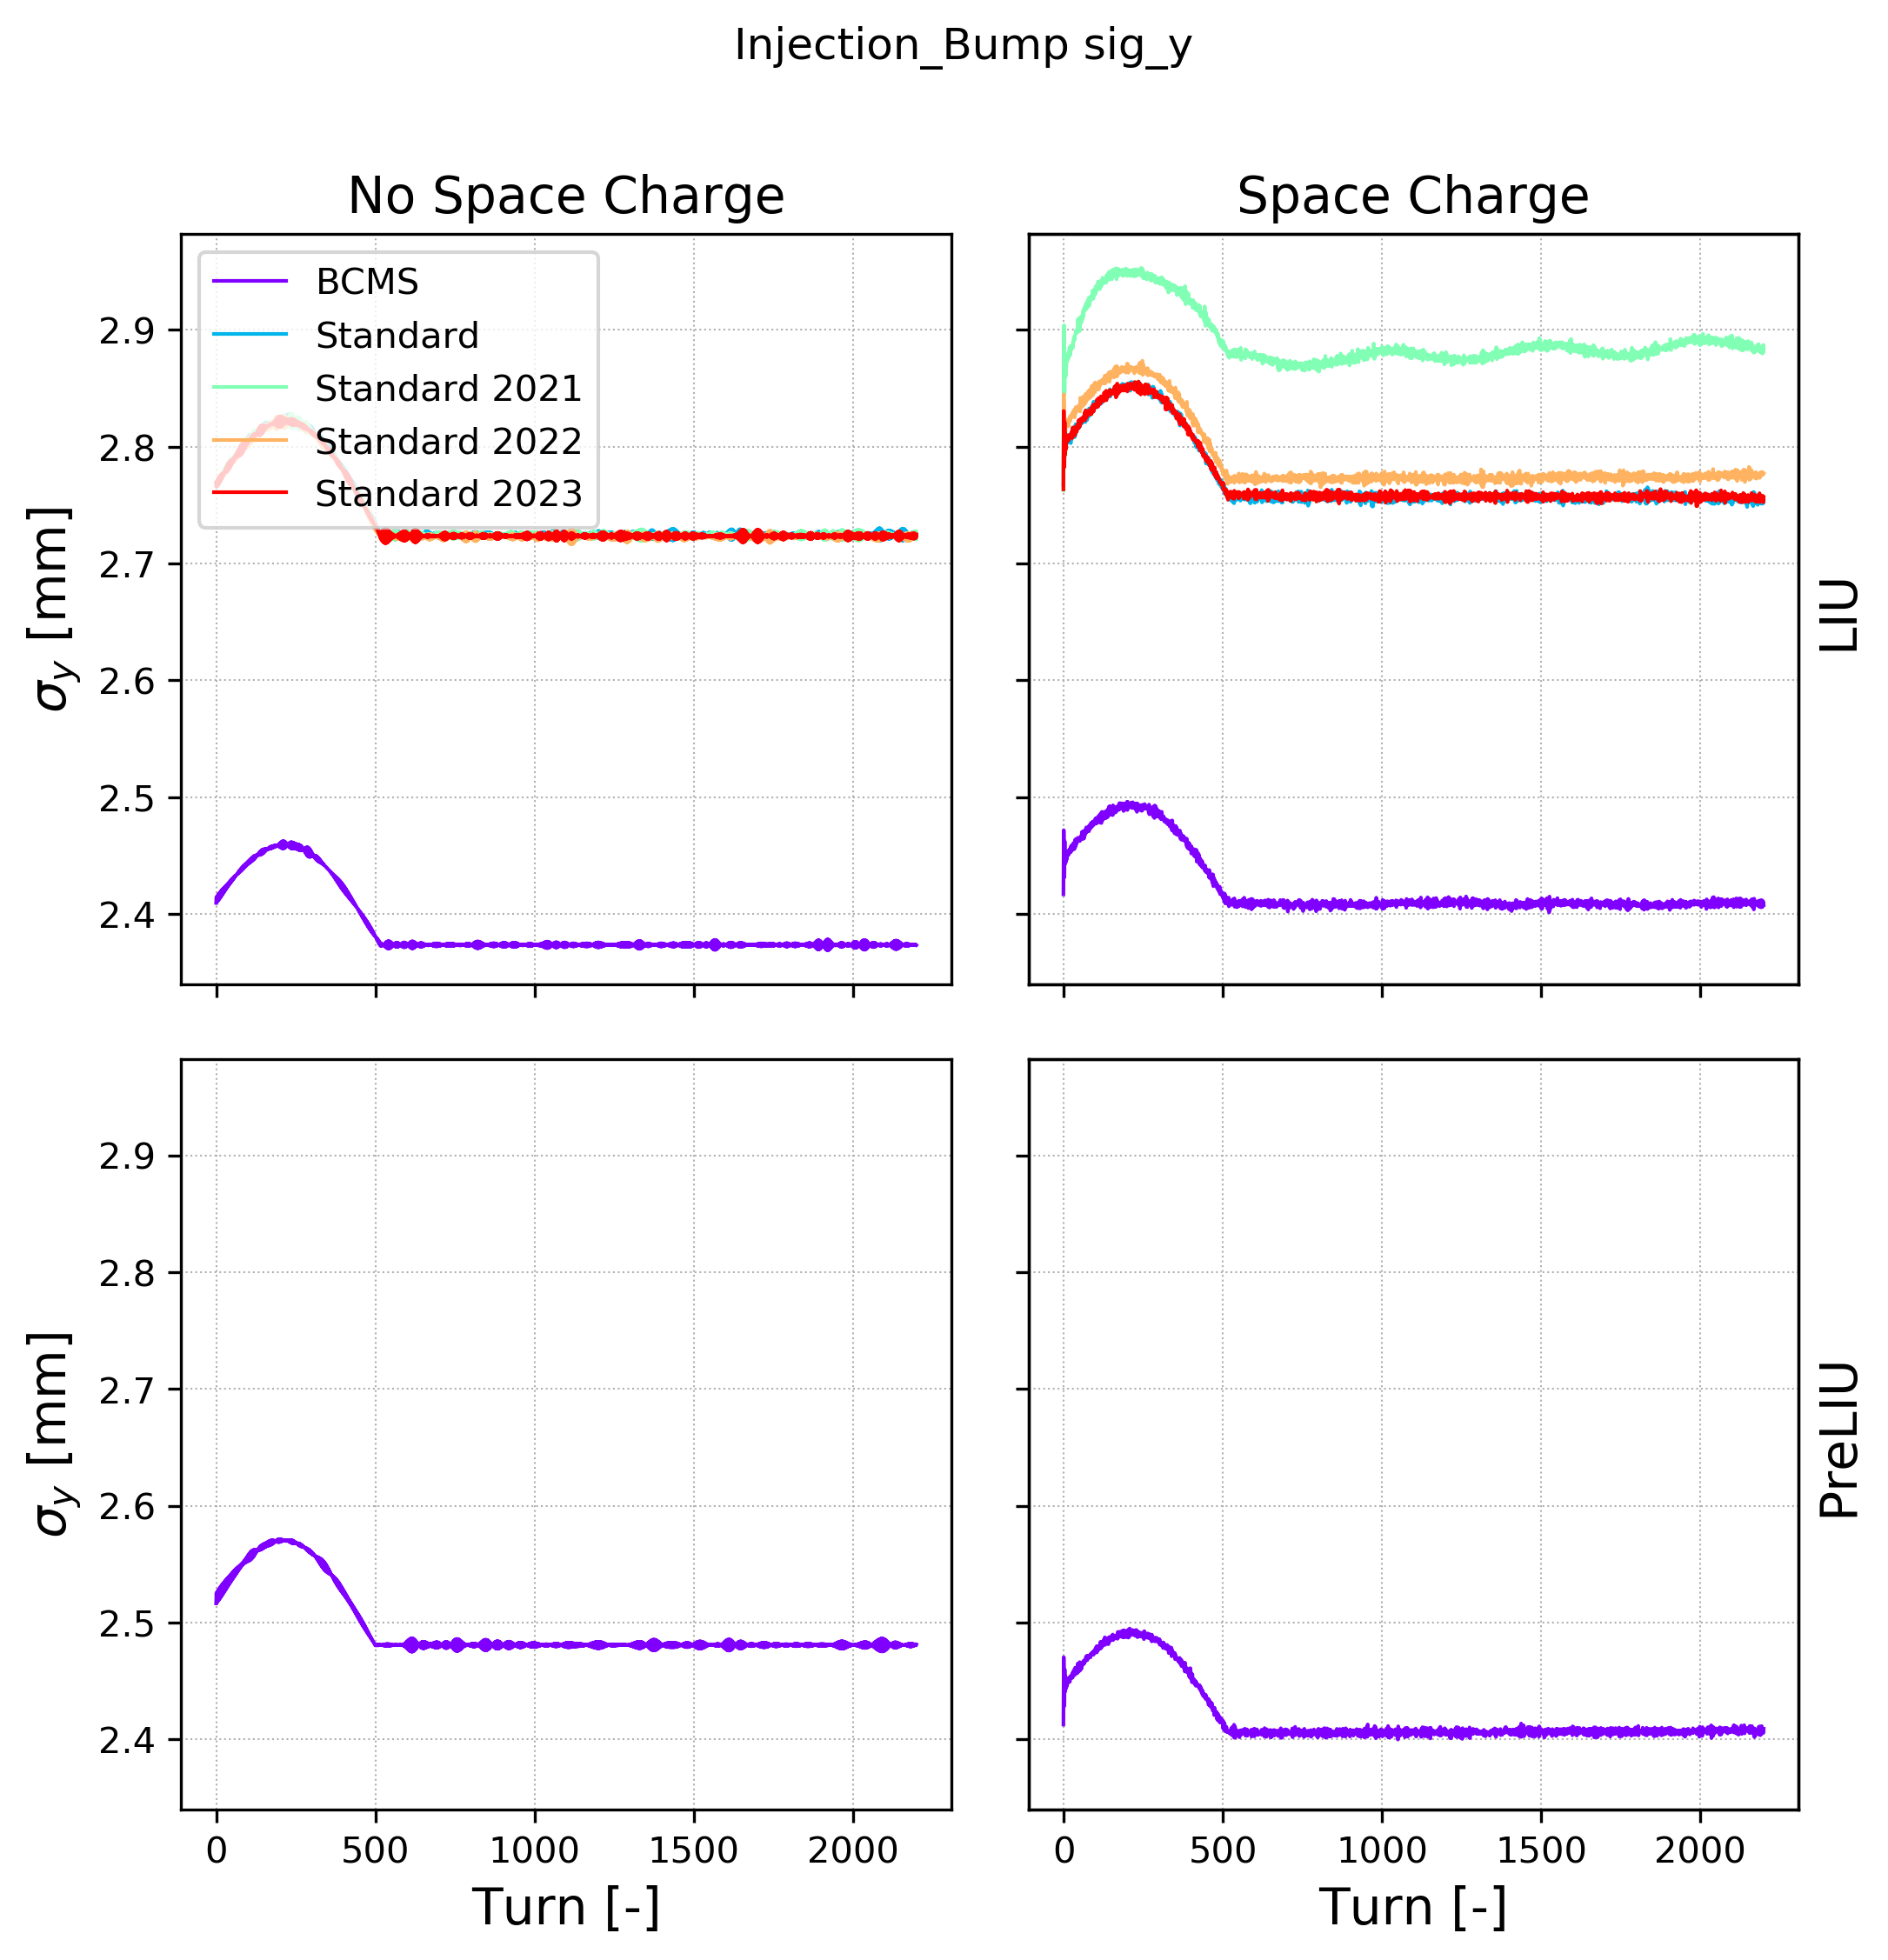

In [12]:
parameter = 'sig_y'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax3.set_ylabel(r'$\sigma_y$ [mm]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

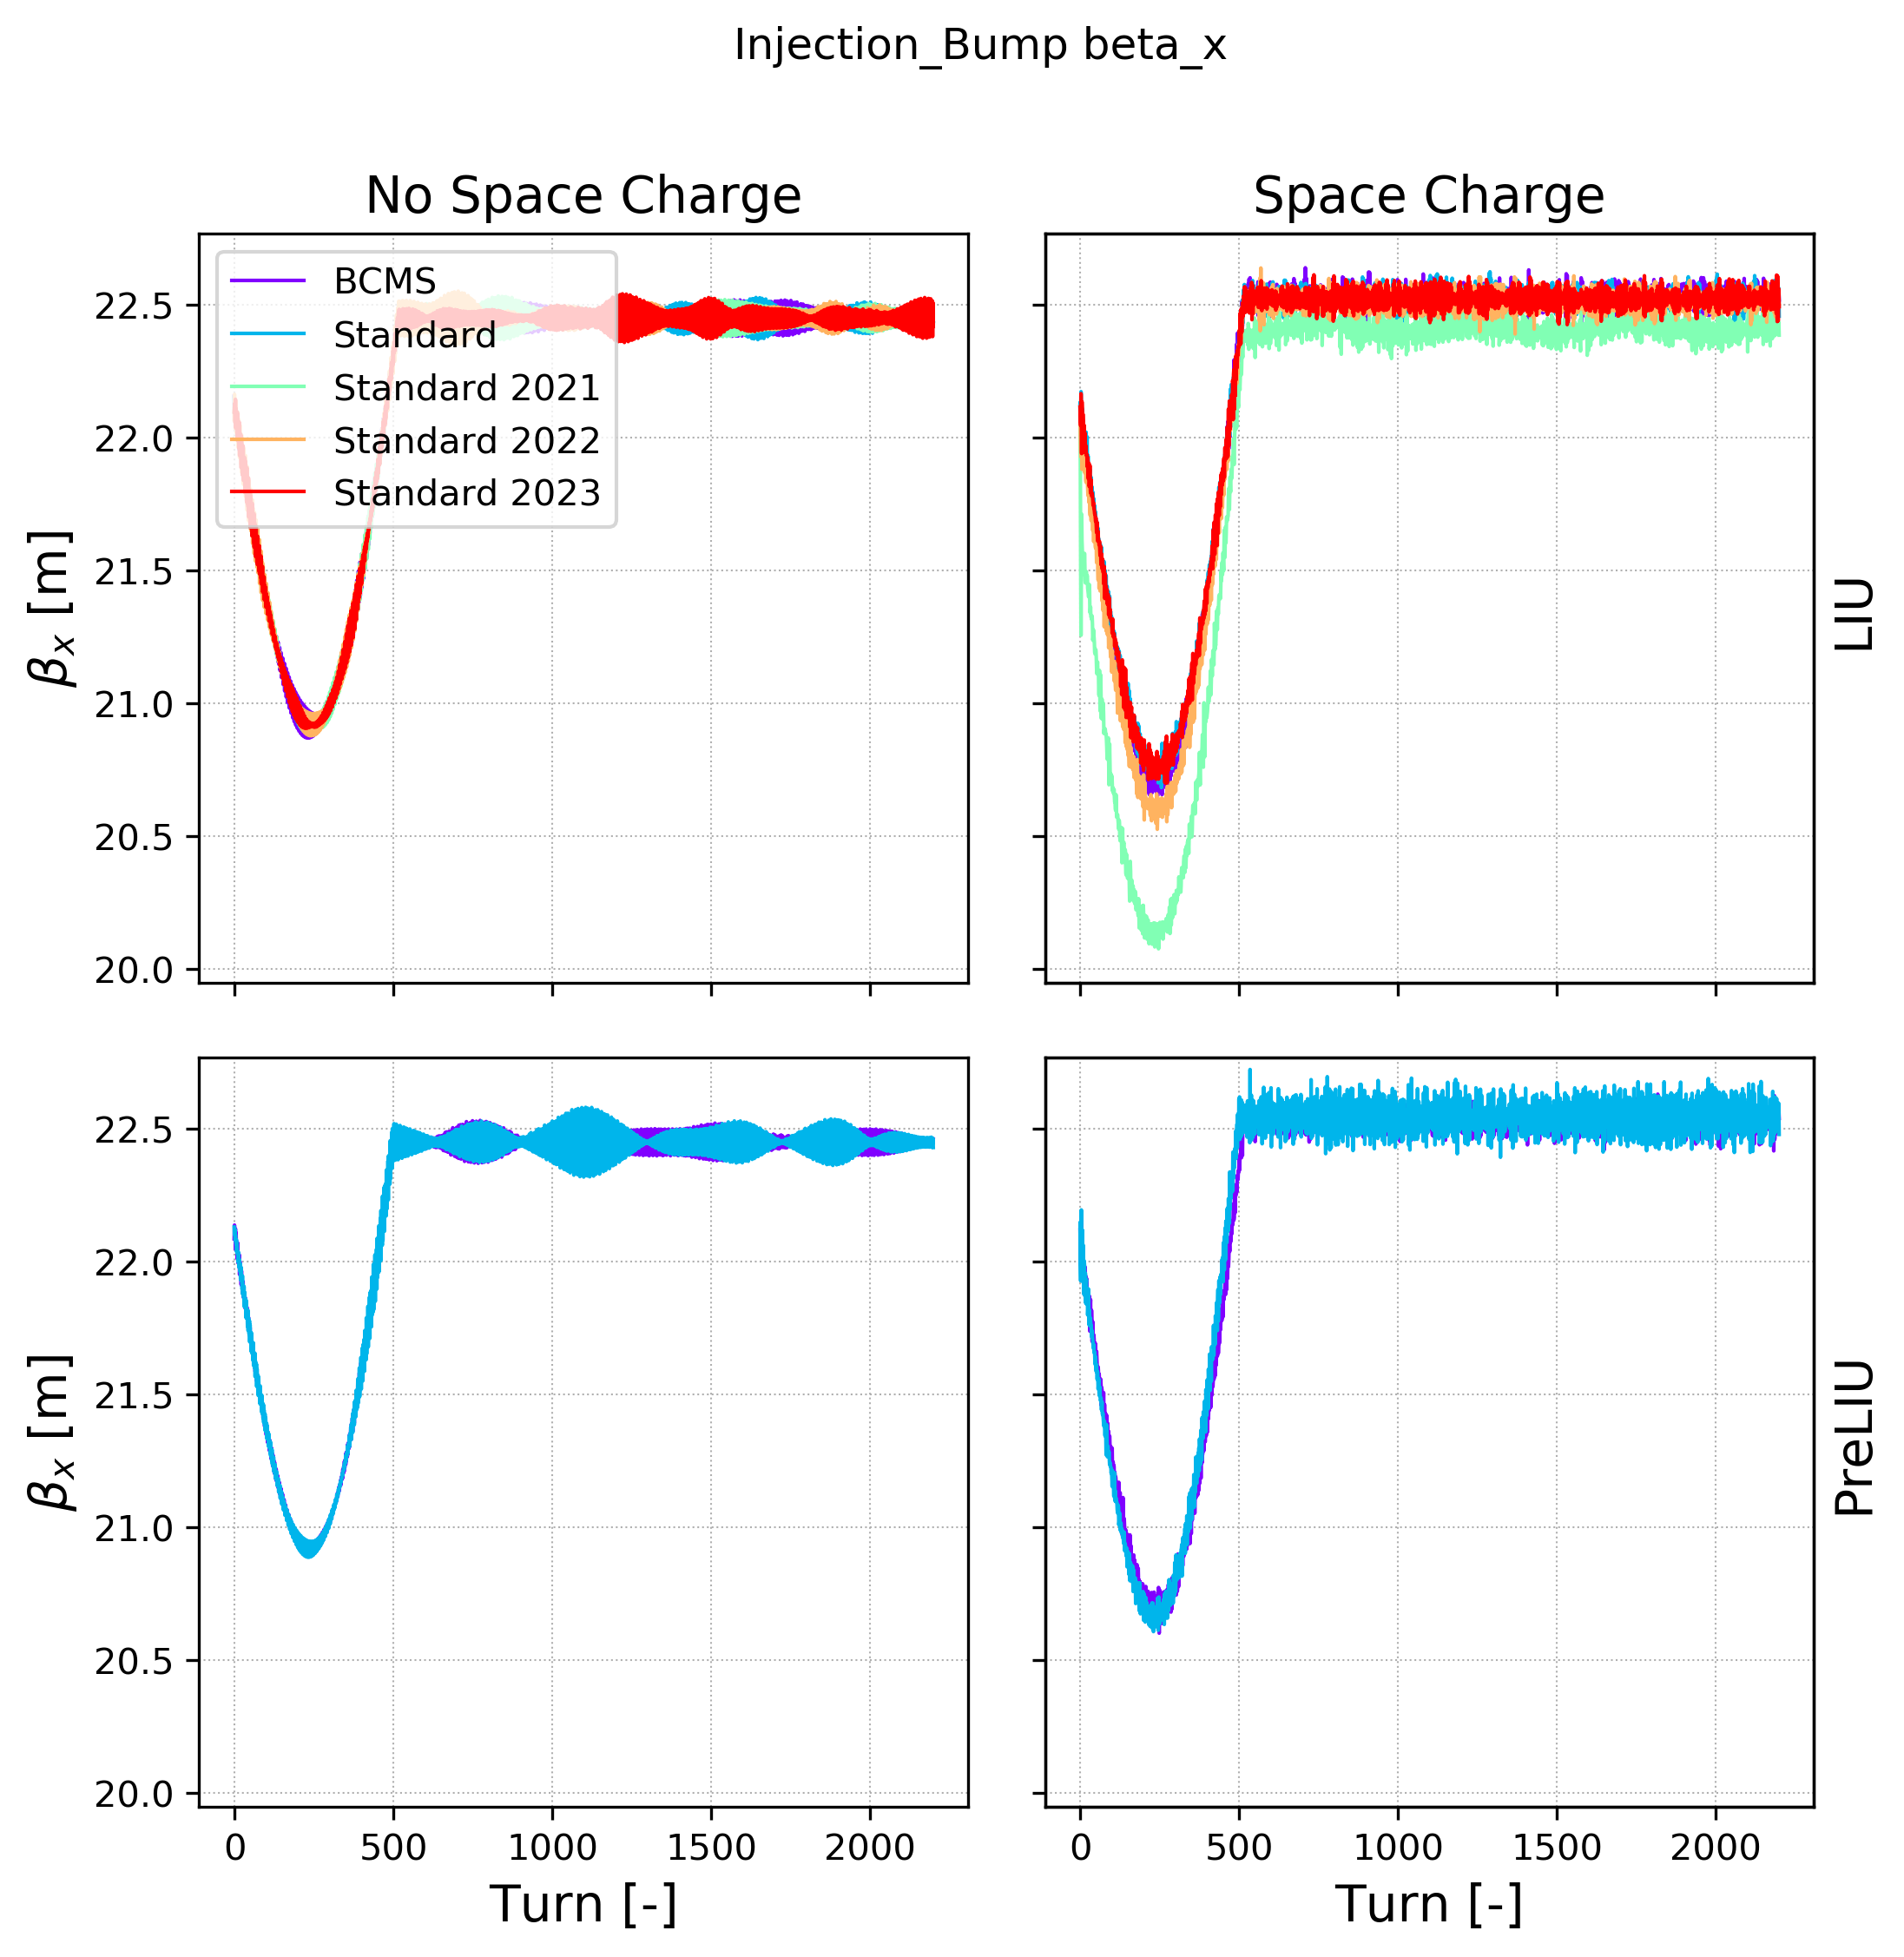

In [13]:
parameter = 'beta_x'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\beta_x$ [m]');
ax3.set_ylabel(r'$\beta_x$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

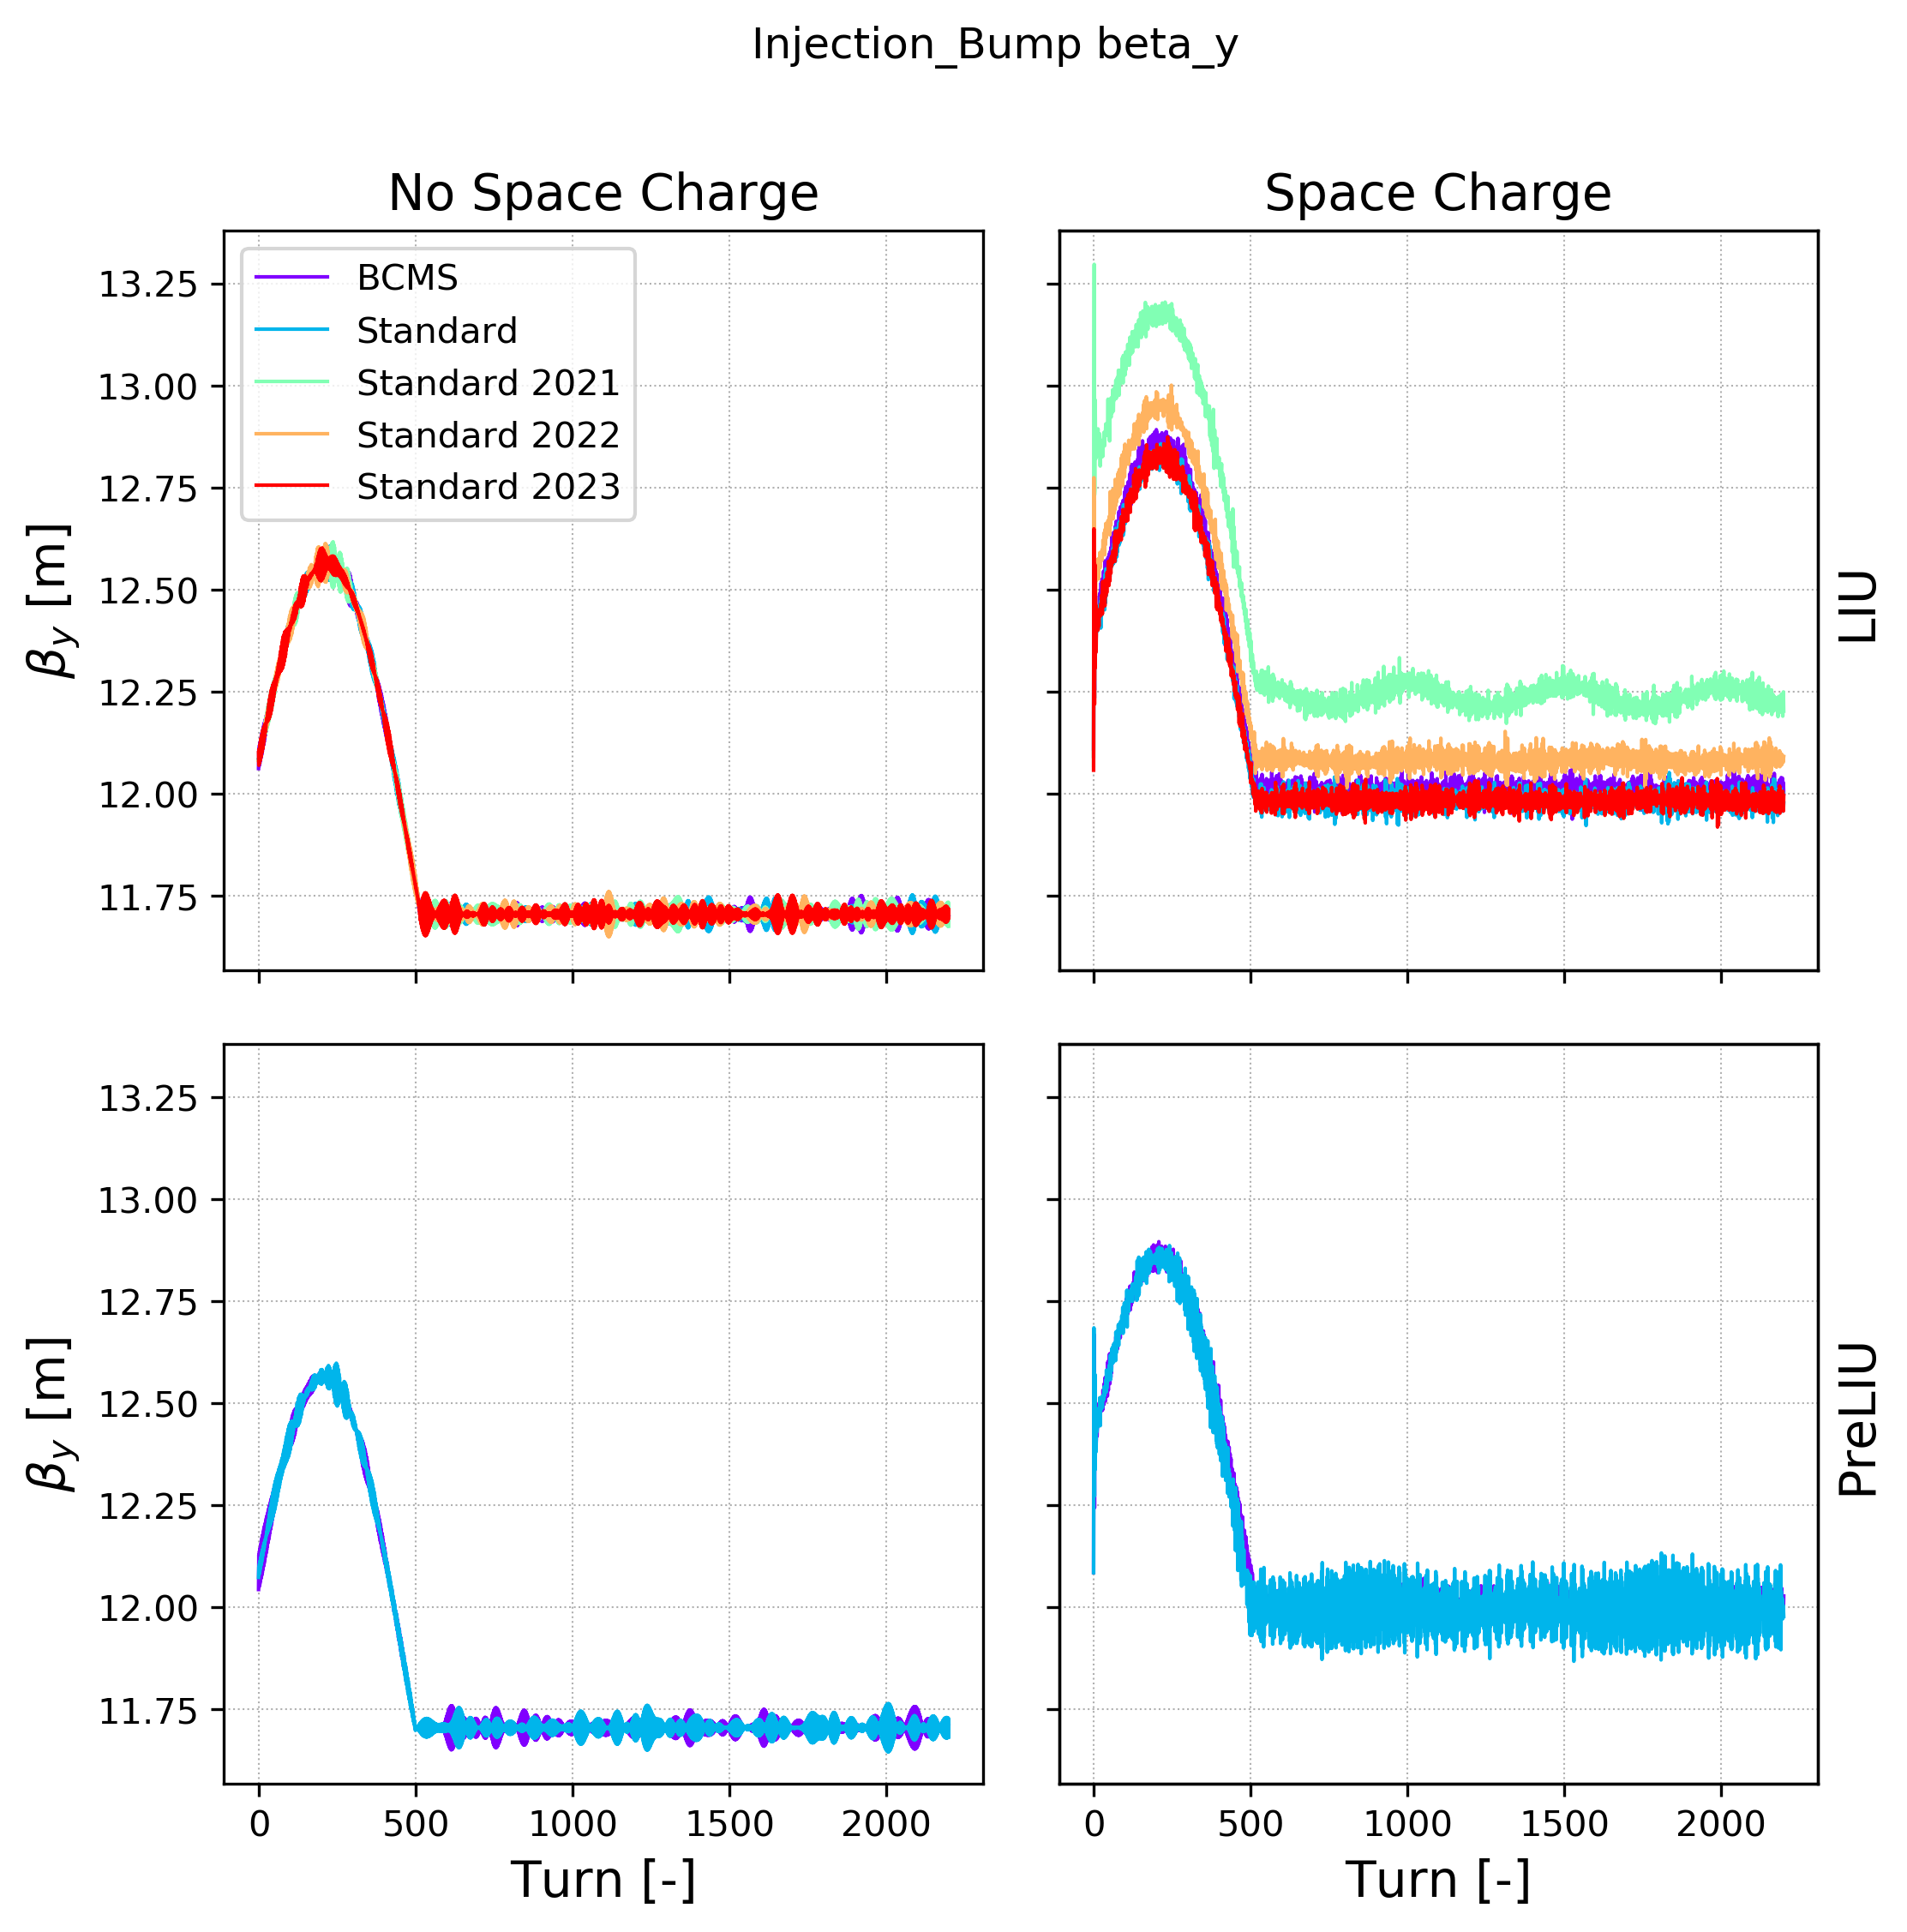

In [14]:
parameter = 'beta_y'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\beta_y$ [m]');
ax3.set_ylabel(r'$\beta_y$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

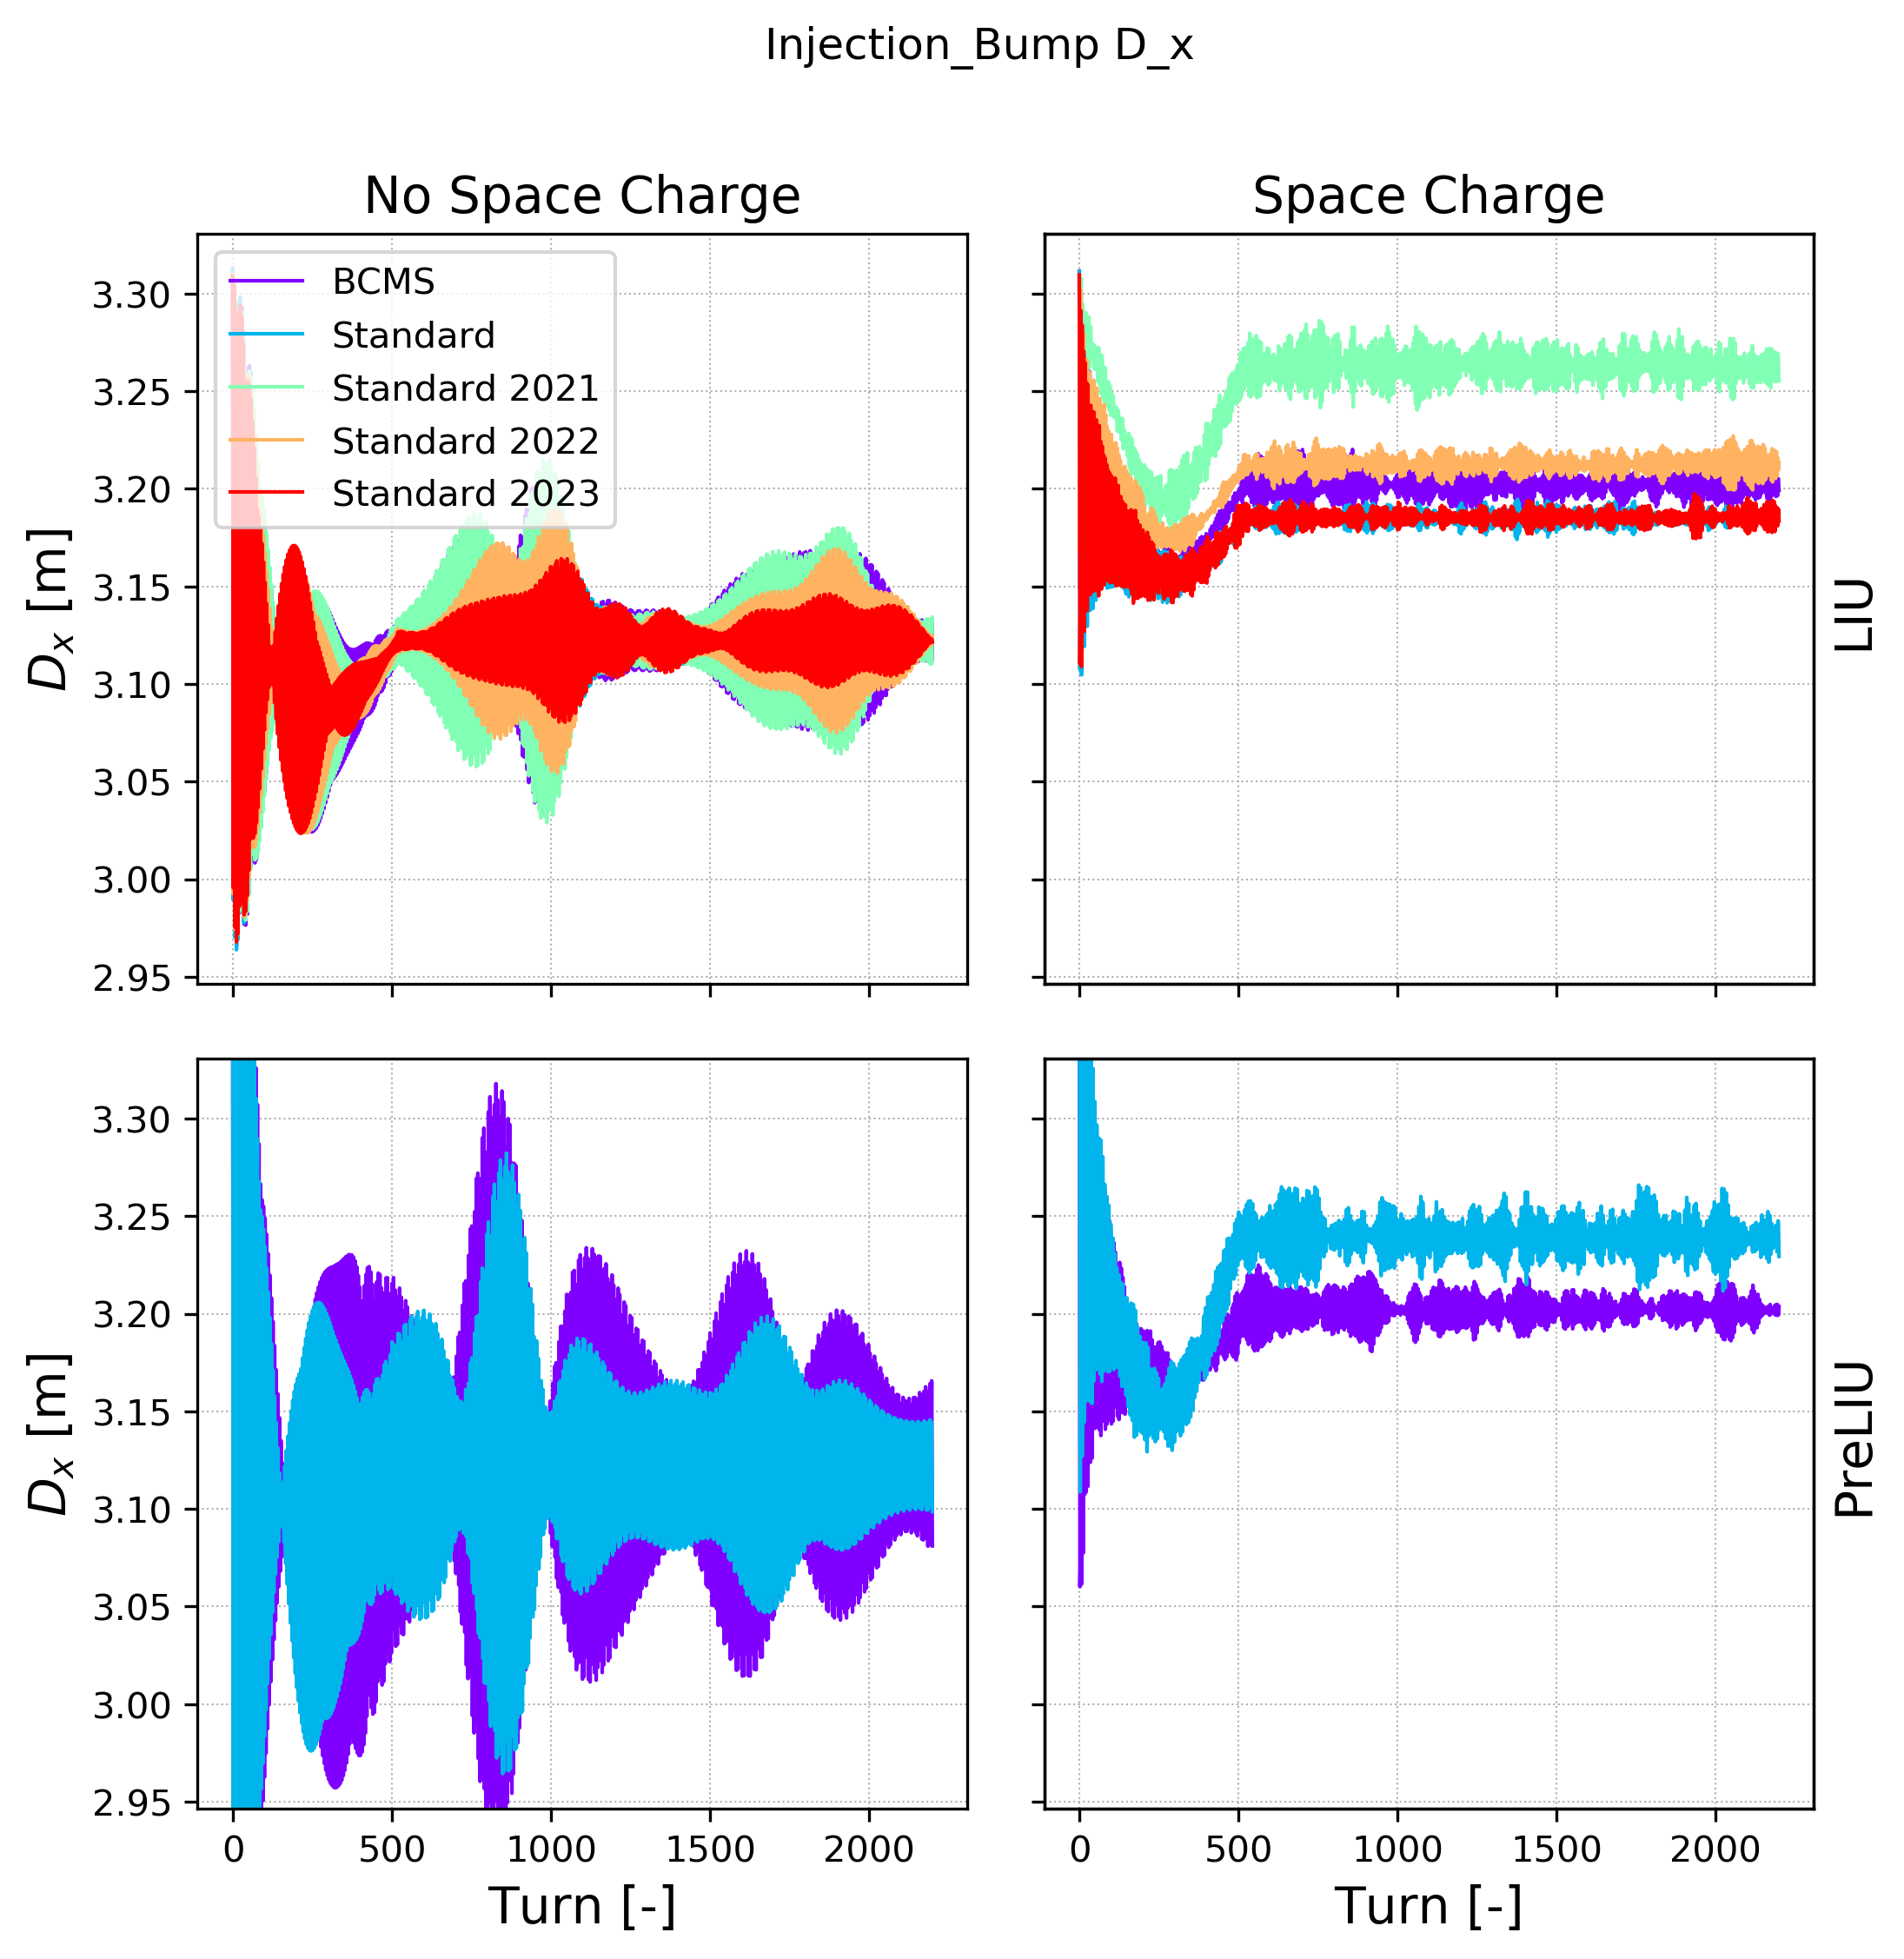

In [15]:
parameter = 'D_x'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$D_x$ [m]');
ax3.set_ylabel(r'$D_x$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

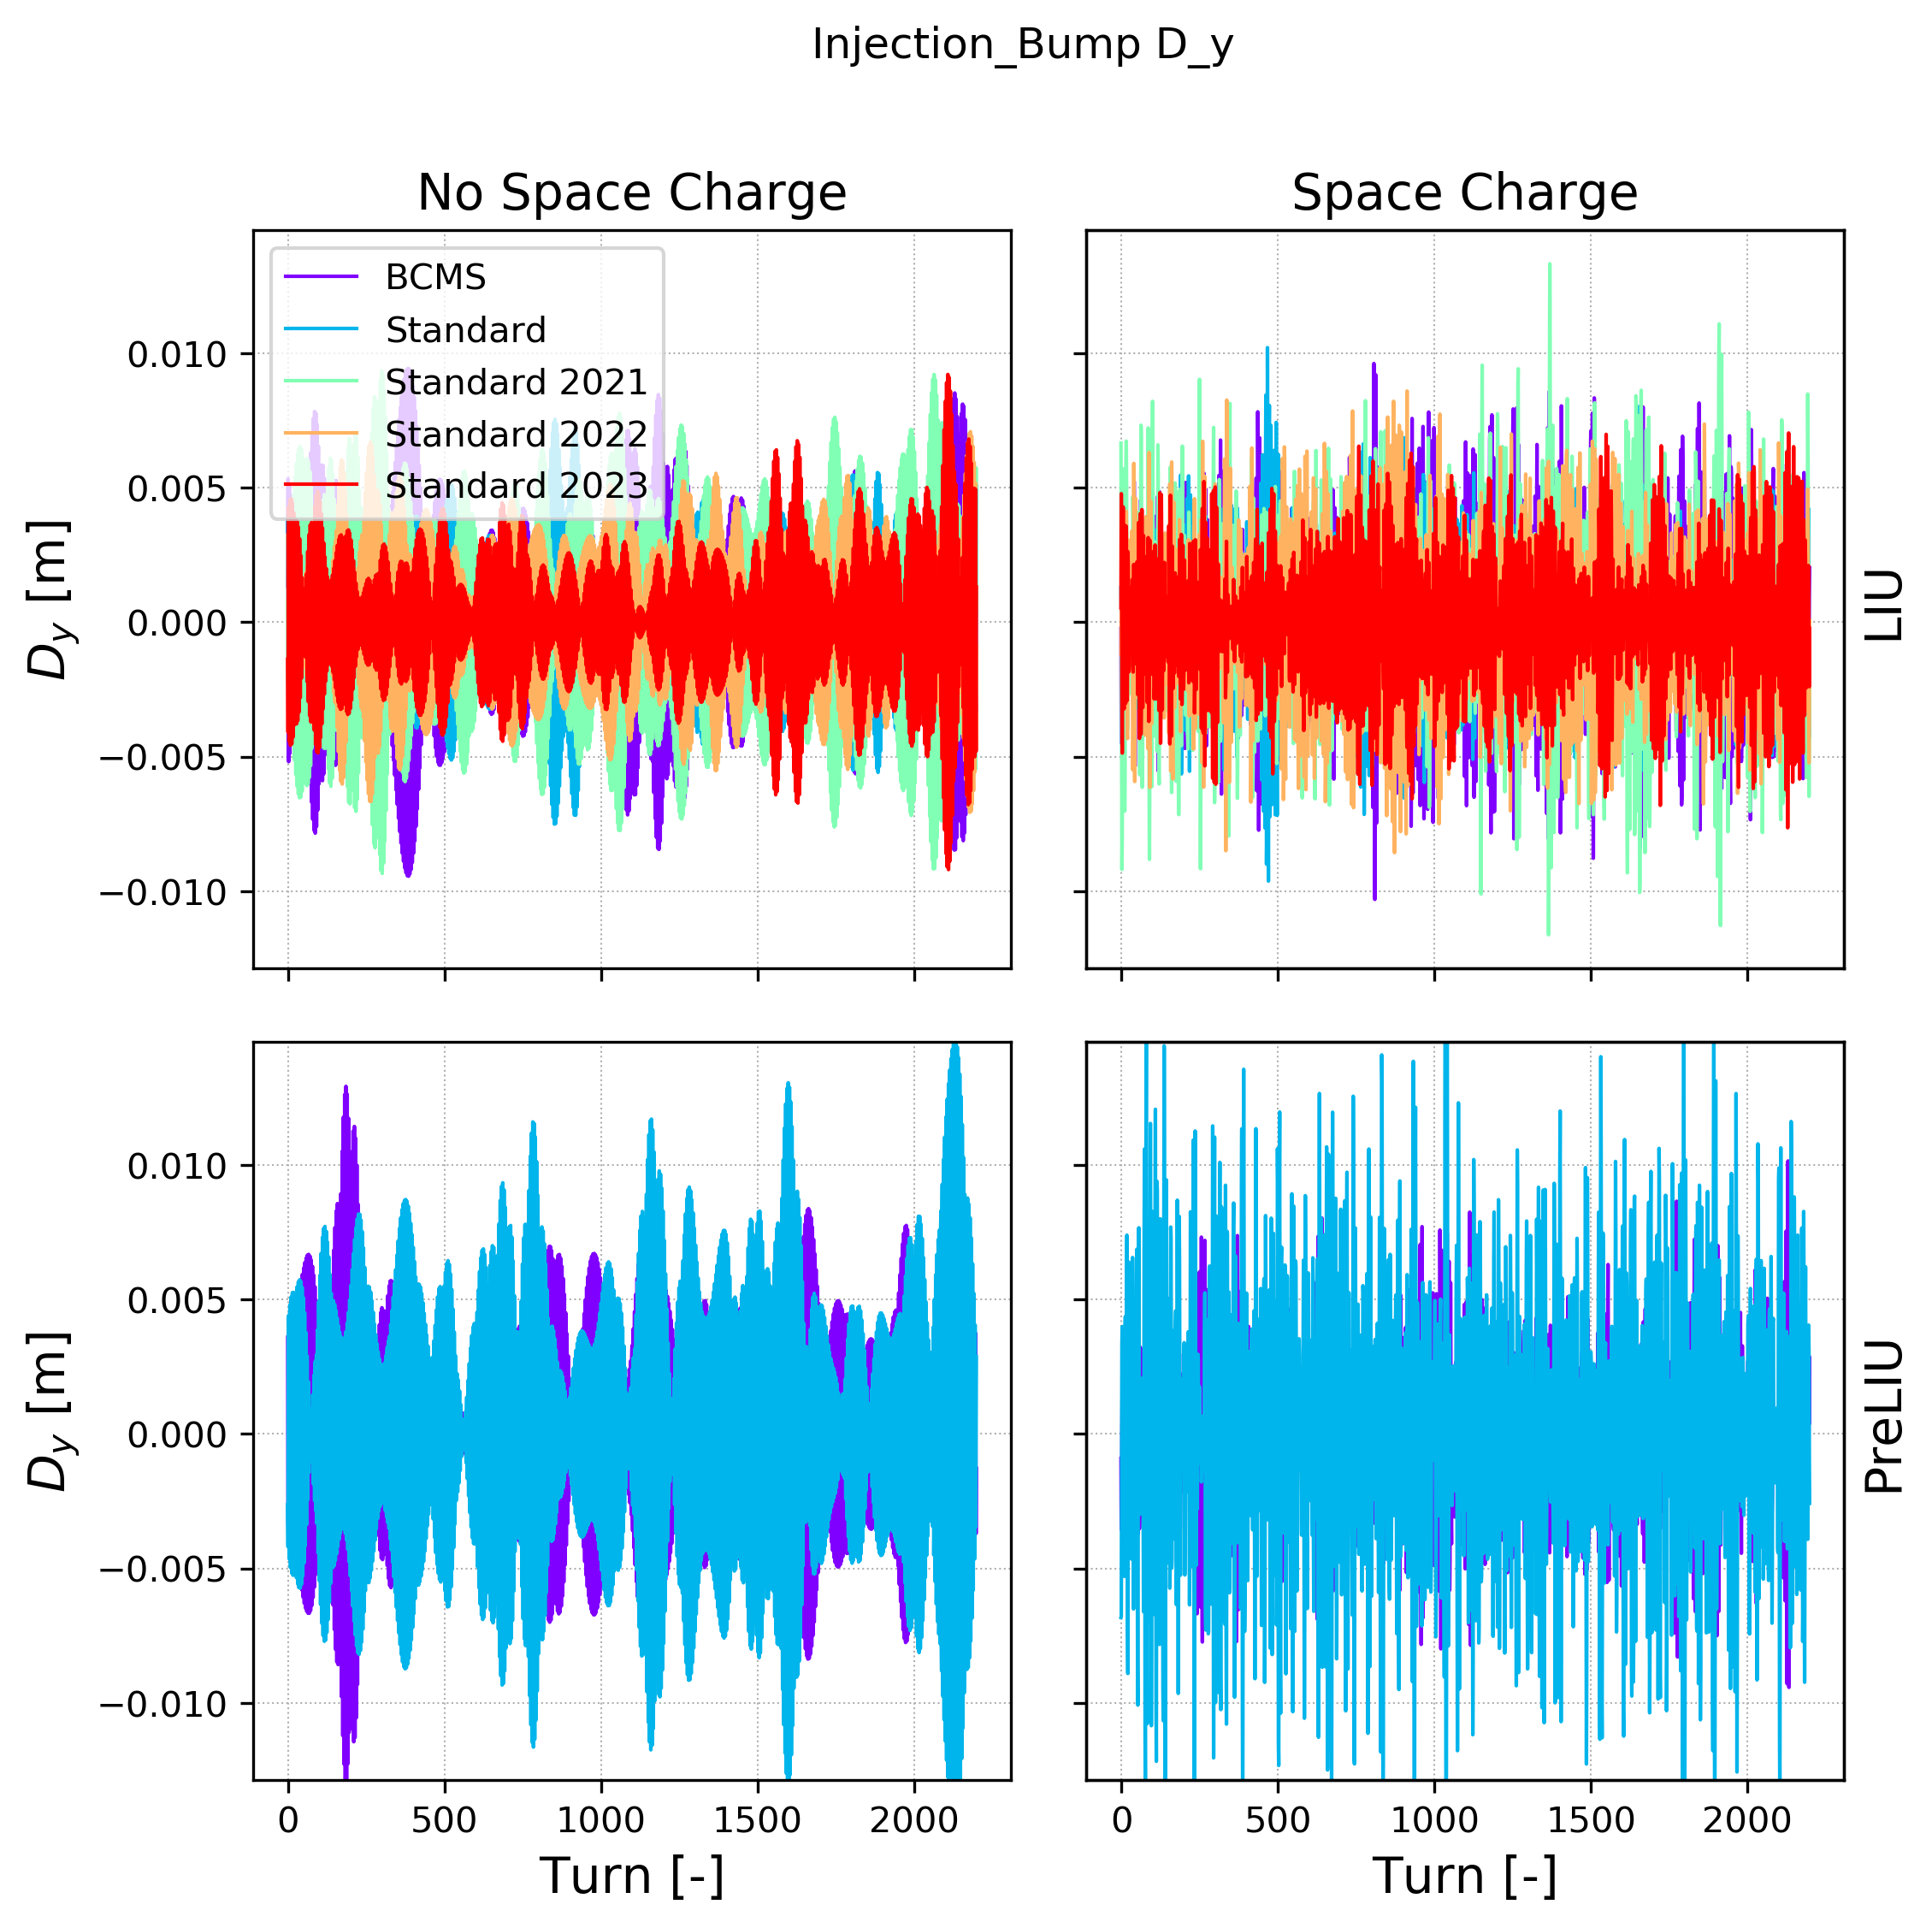

In [16]:
parameter = 'D_y'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$D_y$ [m]');
ax3.set_ylabel(r'$D_y$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

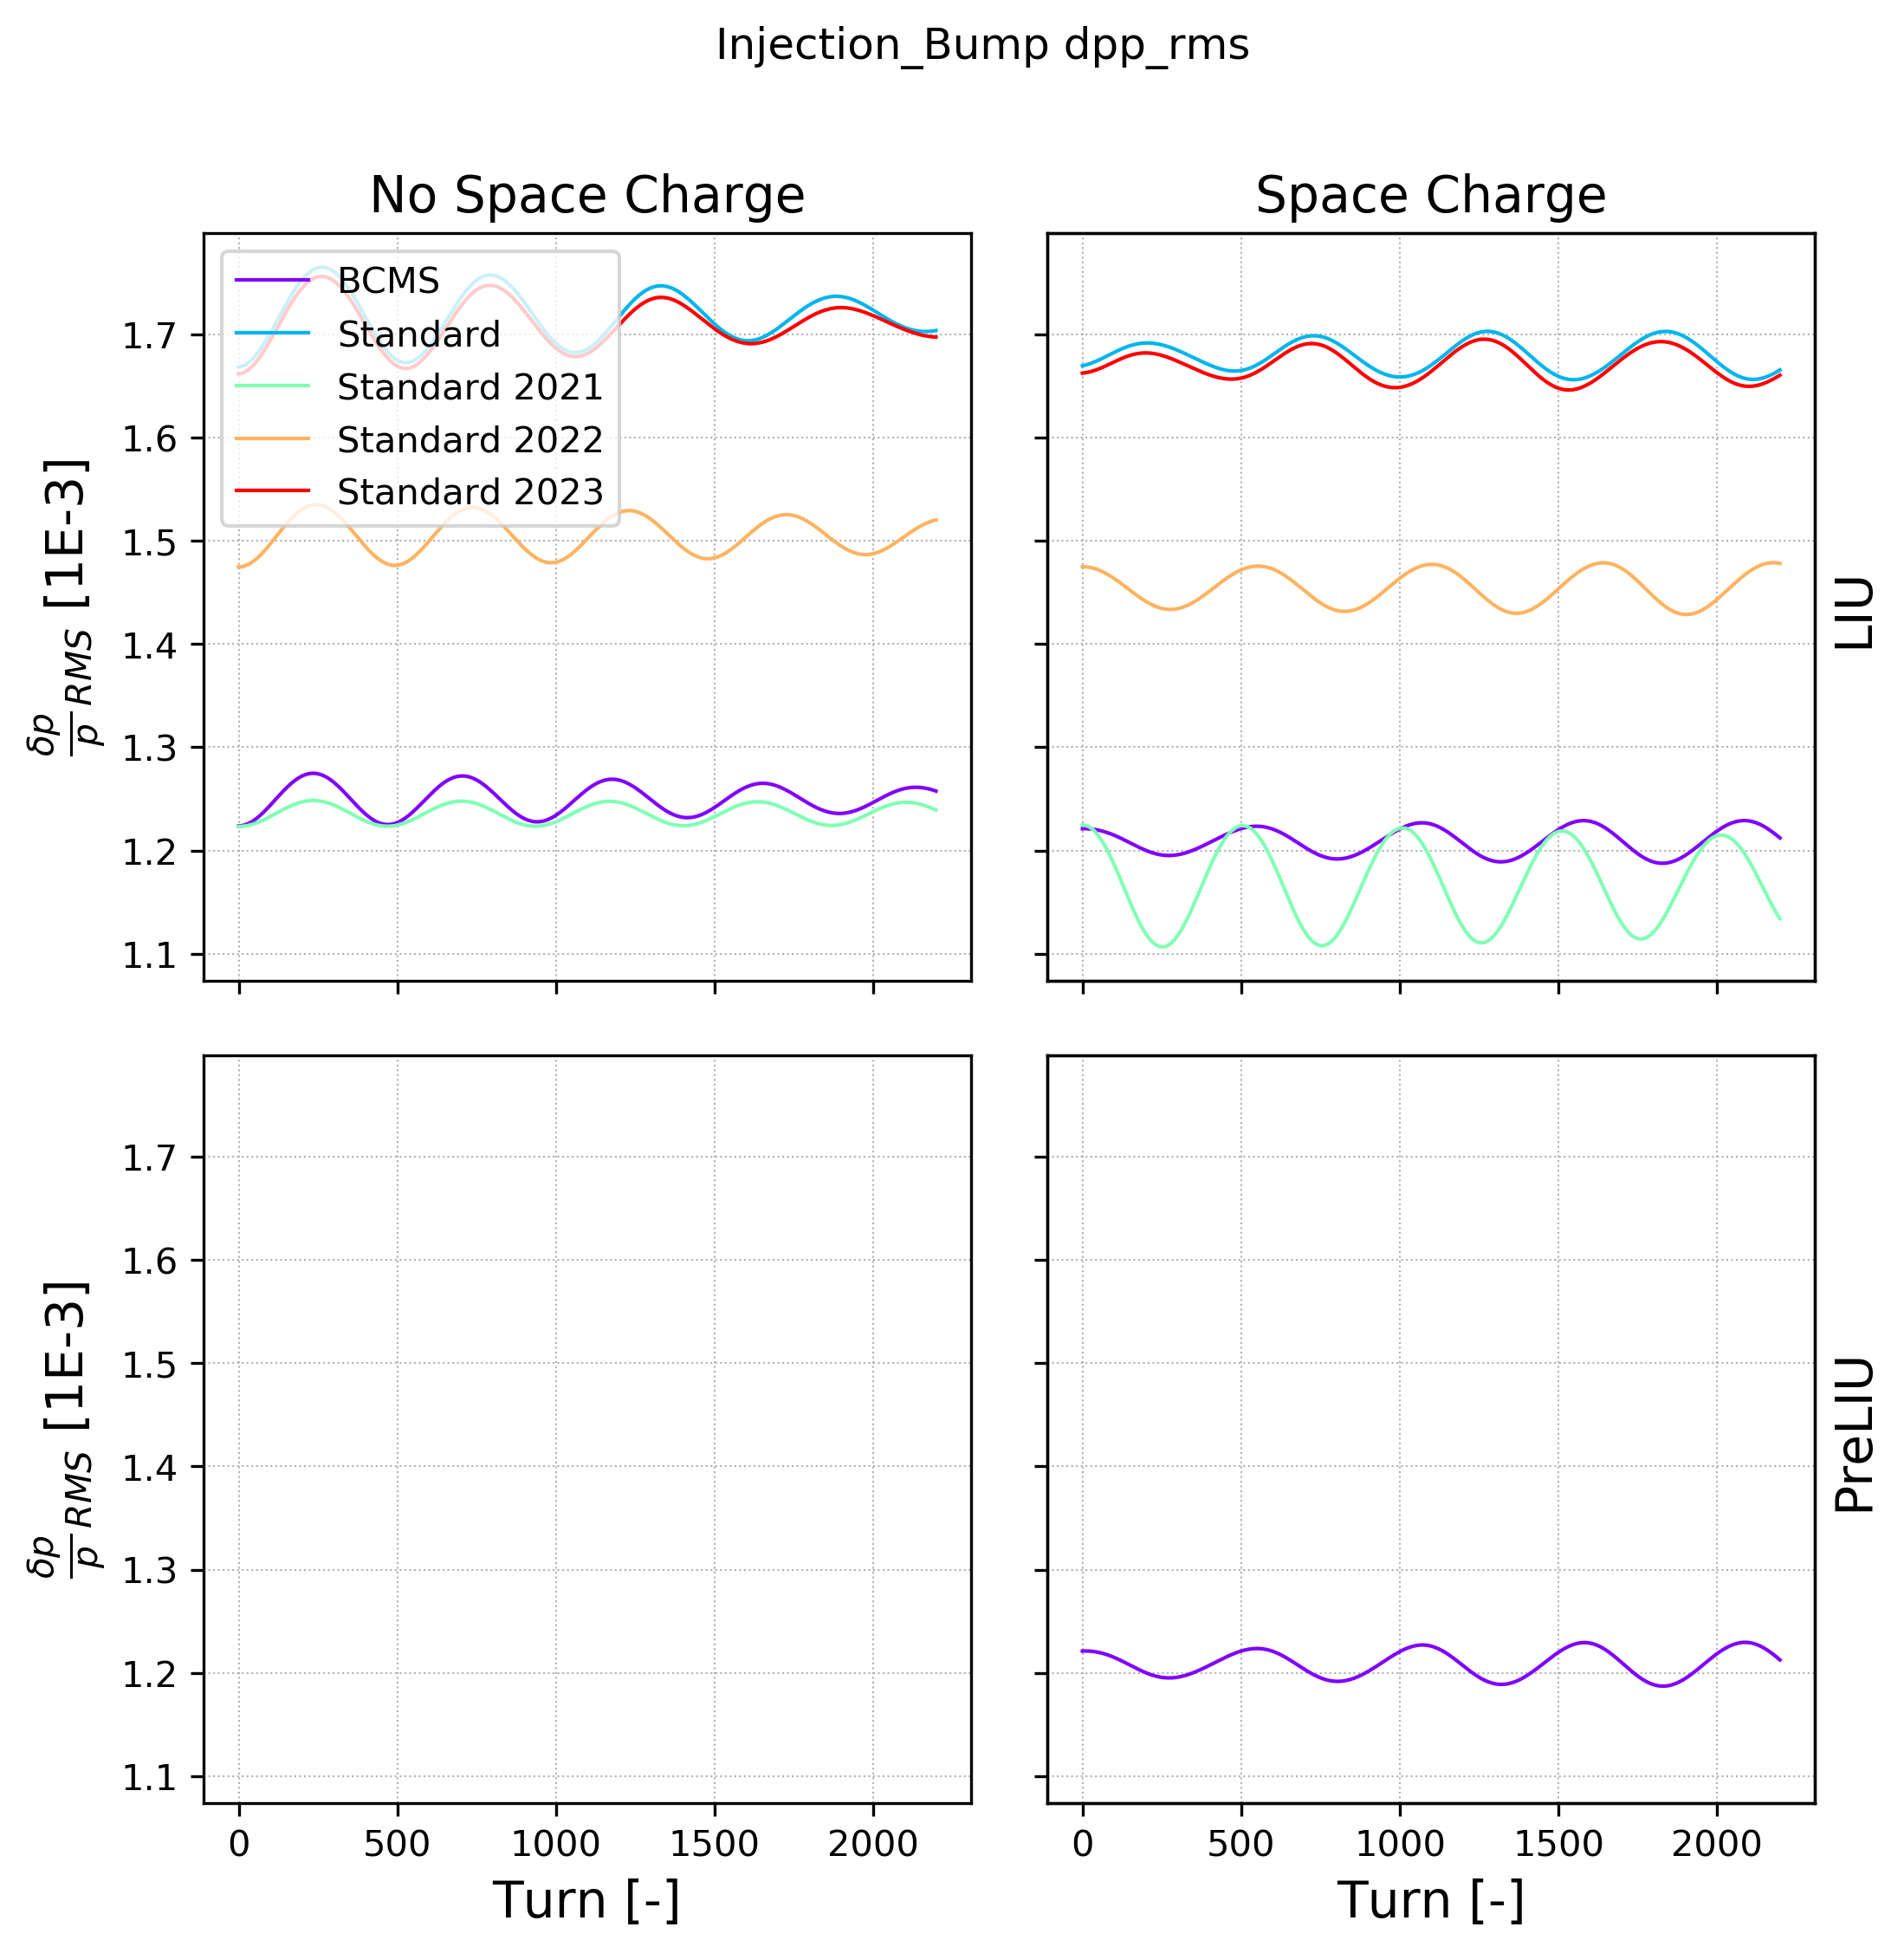

In [17]:
parameter = 'dpp_rms'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax3.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

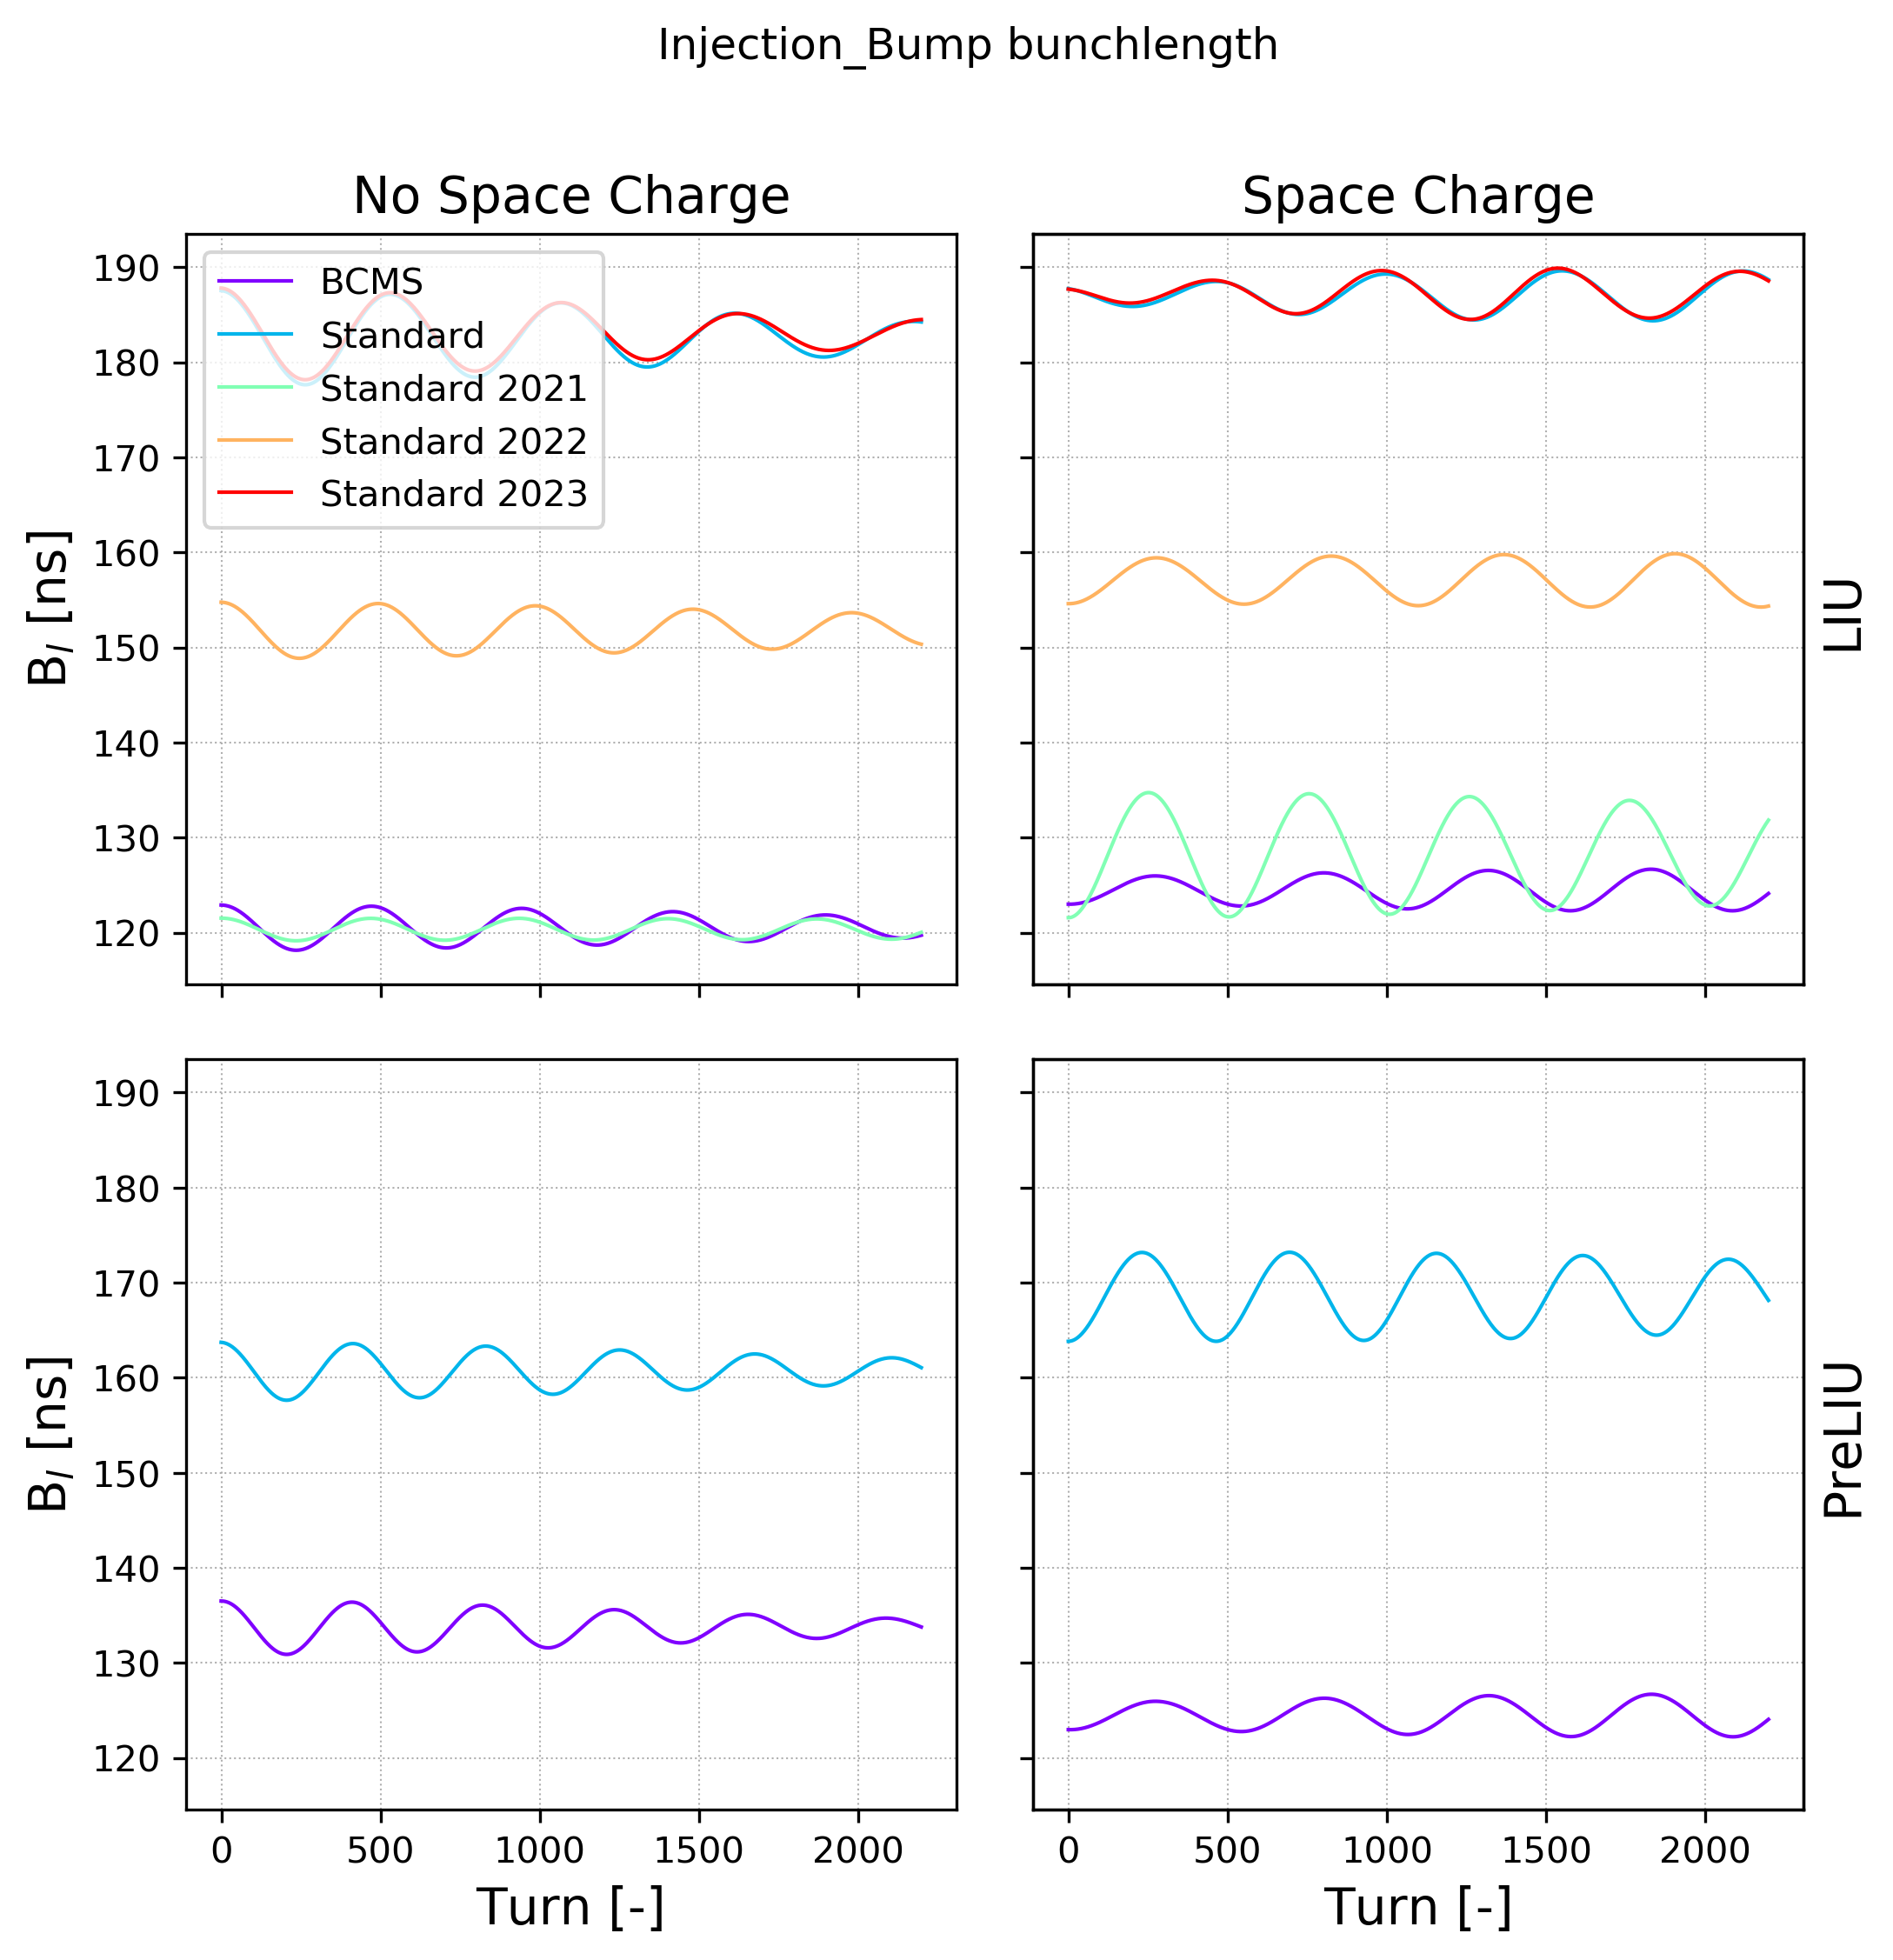

In [18]:
parameter = 'bunchlength'
multi1 = 1E9

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'B$_l$ [ns]');
ax3.set_ylabel(r'B$_l$ [ns]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

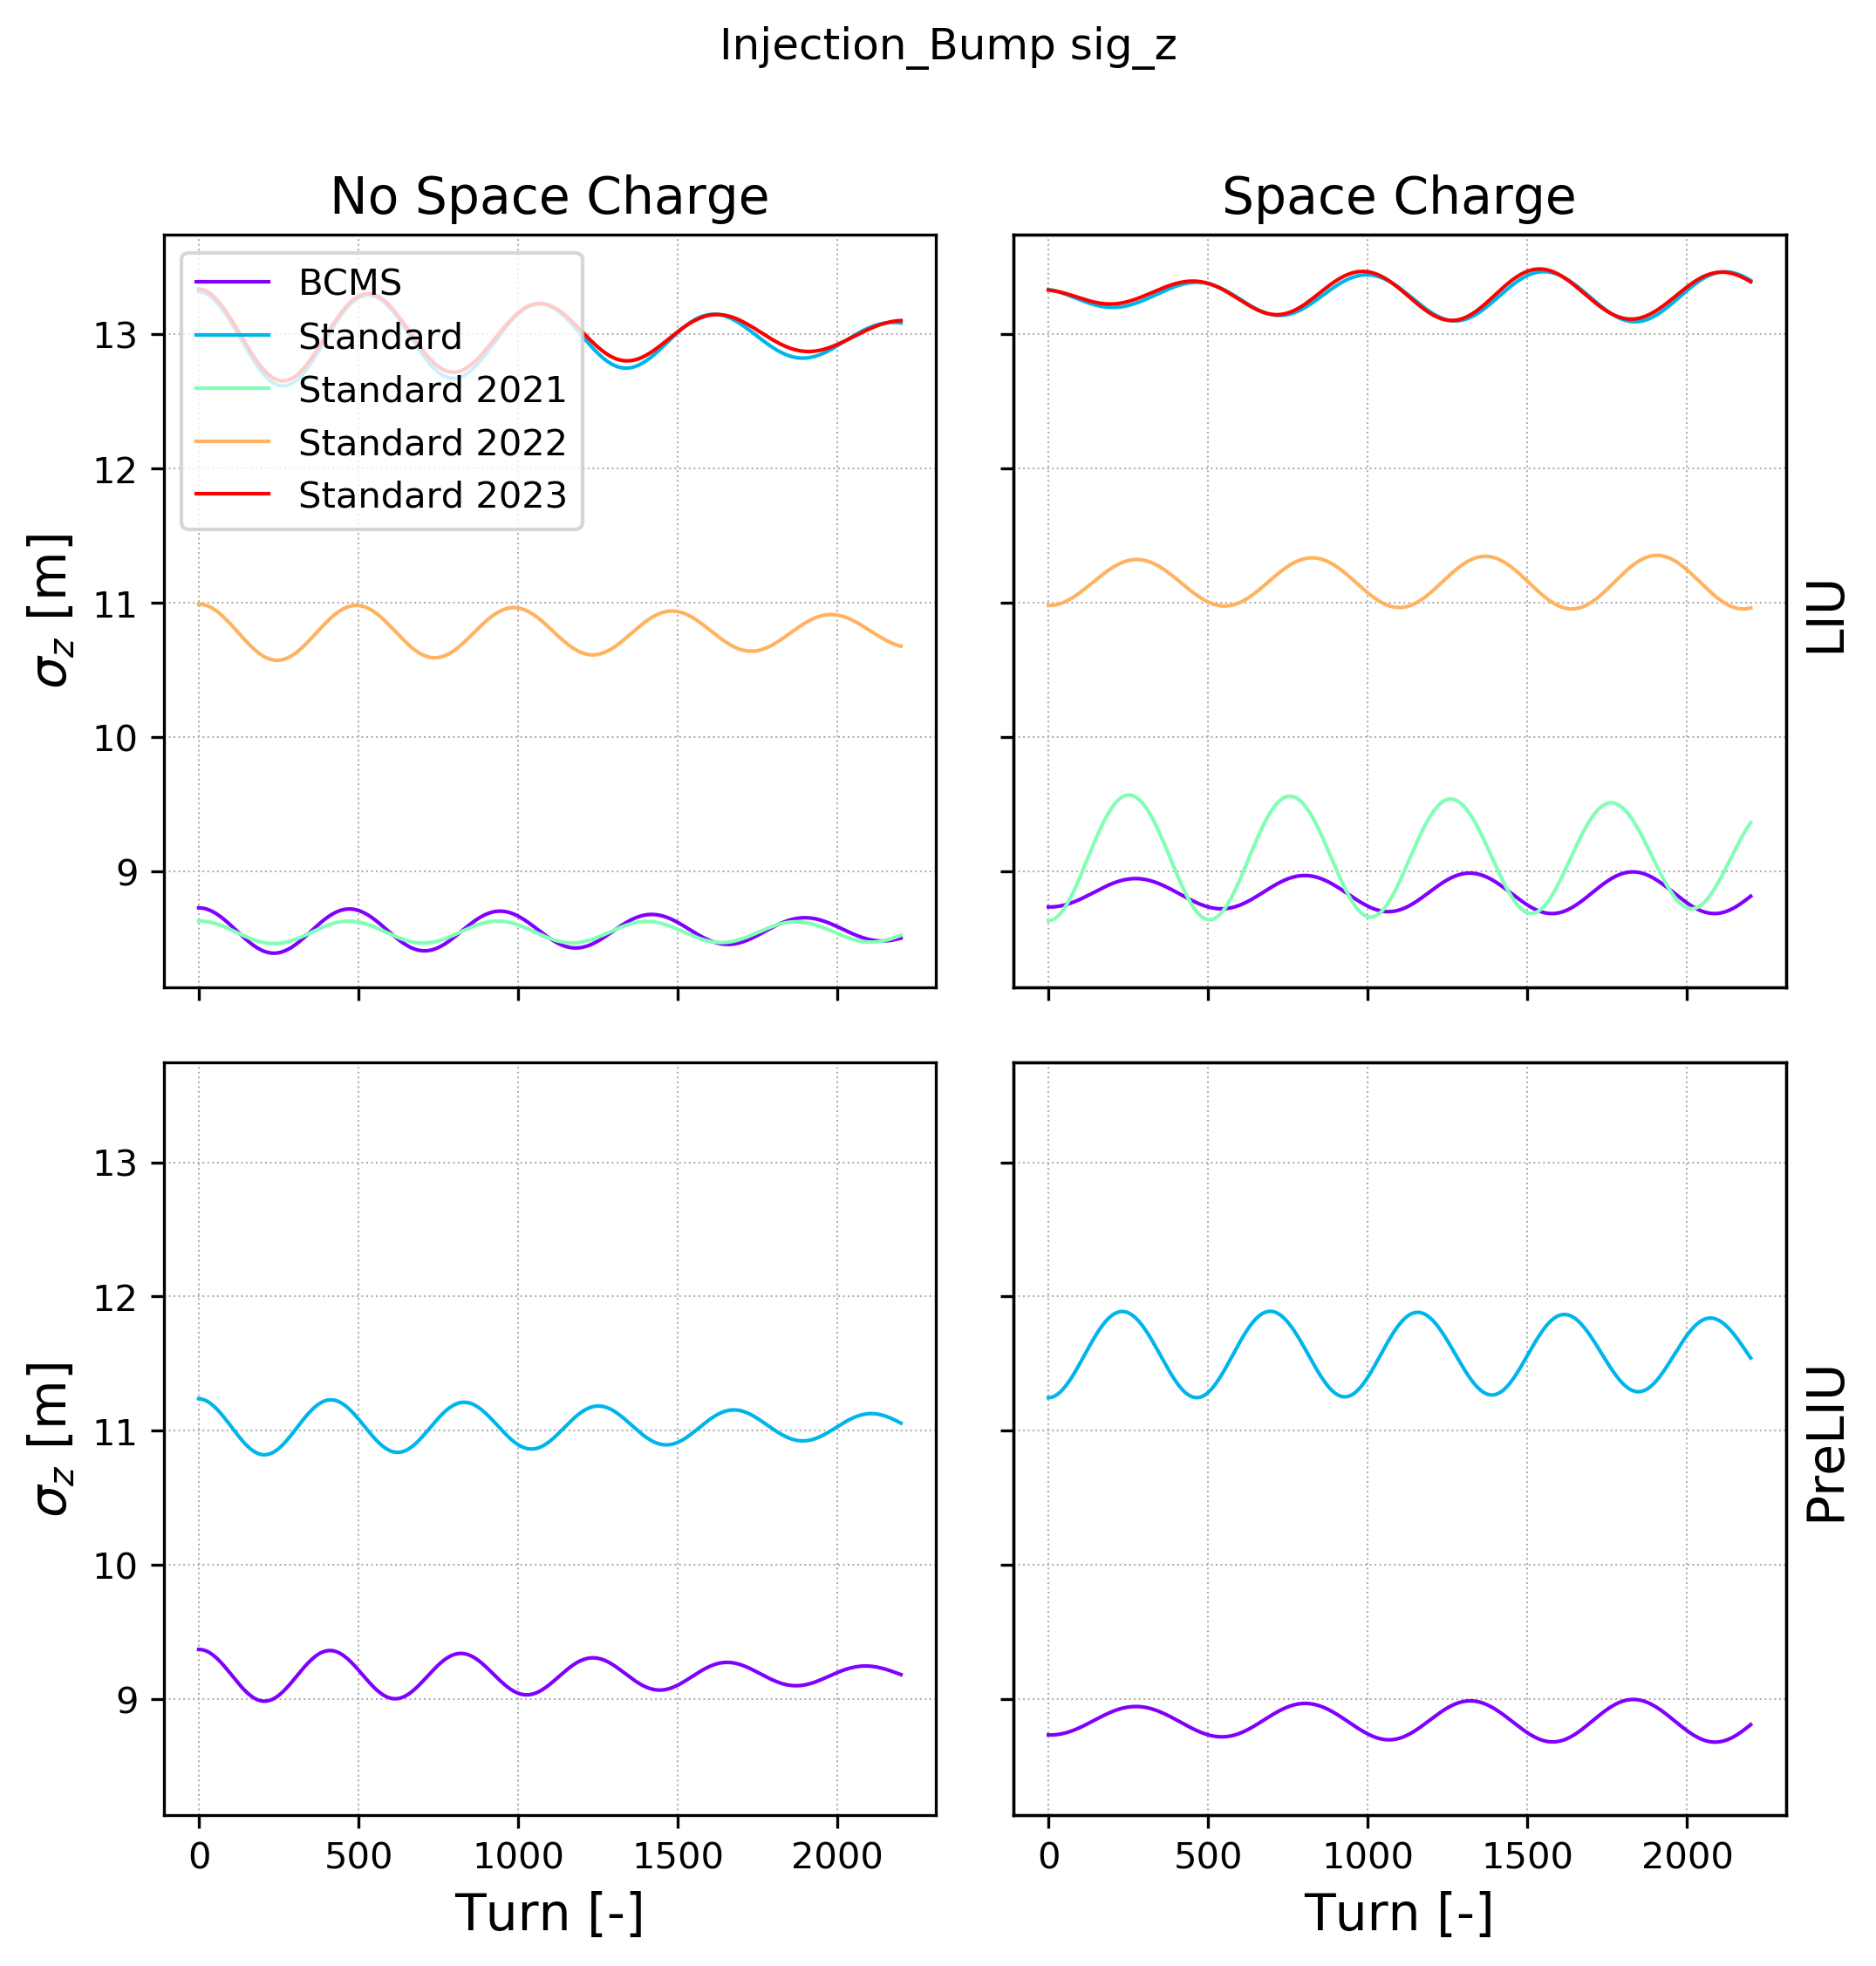

In [19]:
parameter = 'sig_z'
multi1 = 1


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_z$ [m]');
ax3.set_ylabel(r'$\sigma_z$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

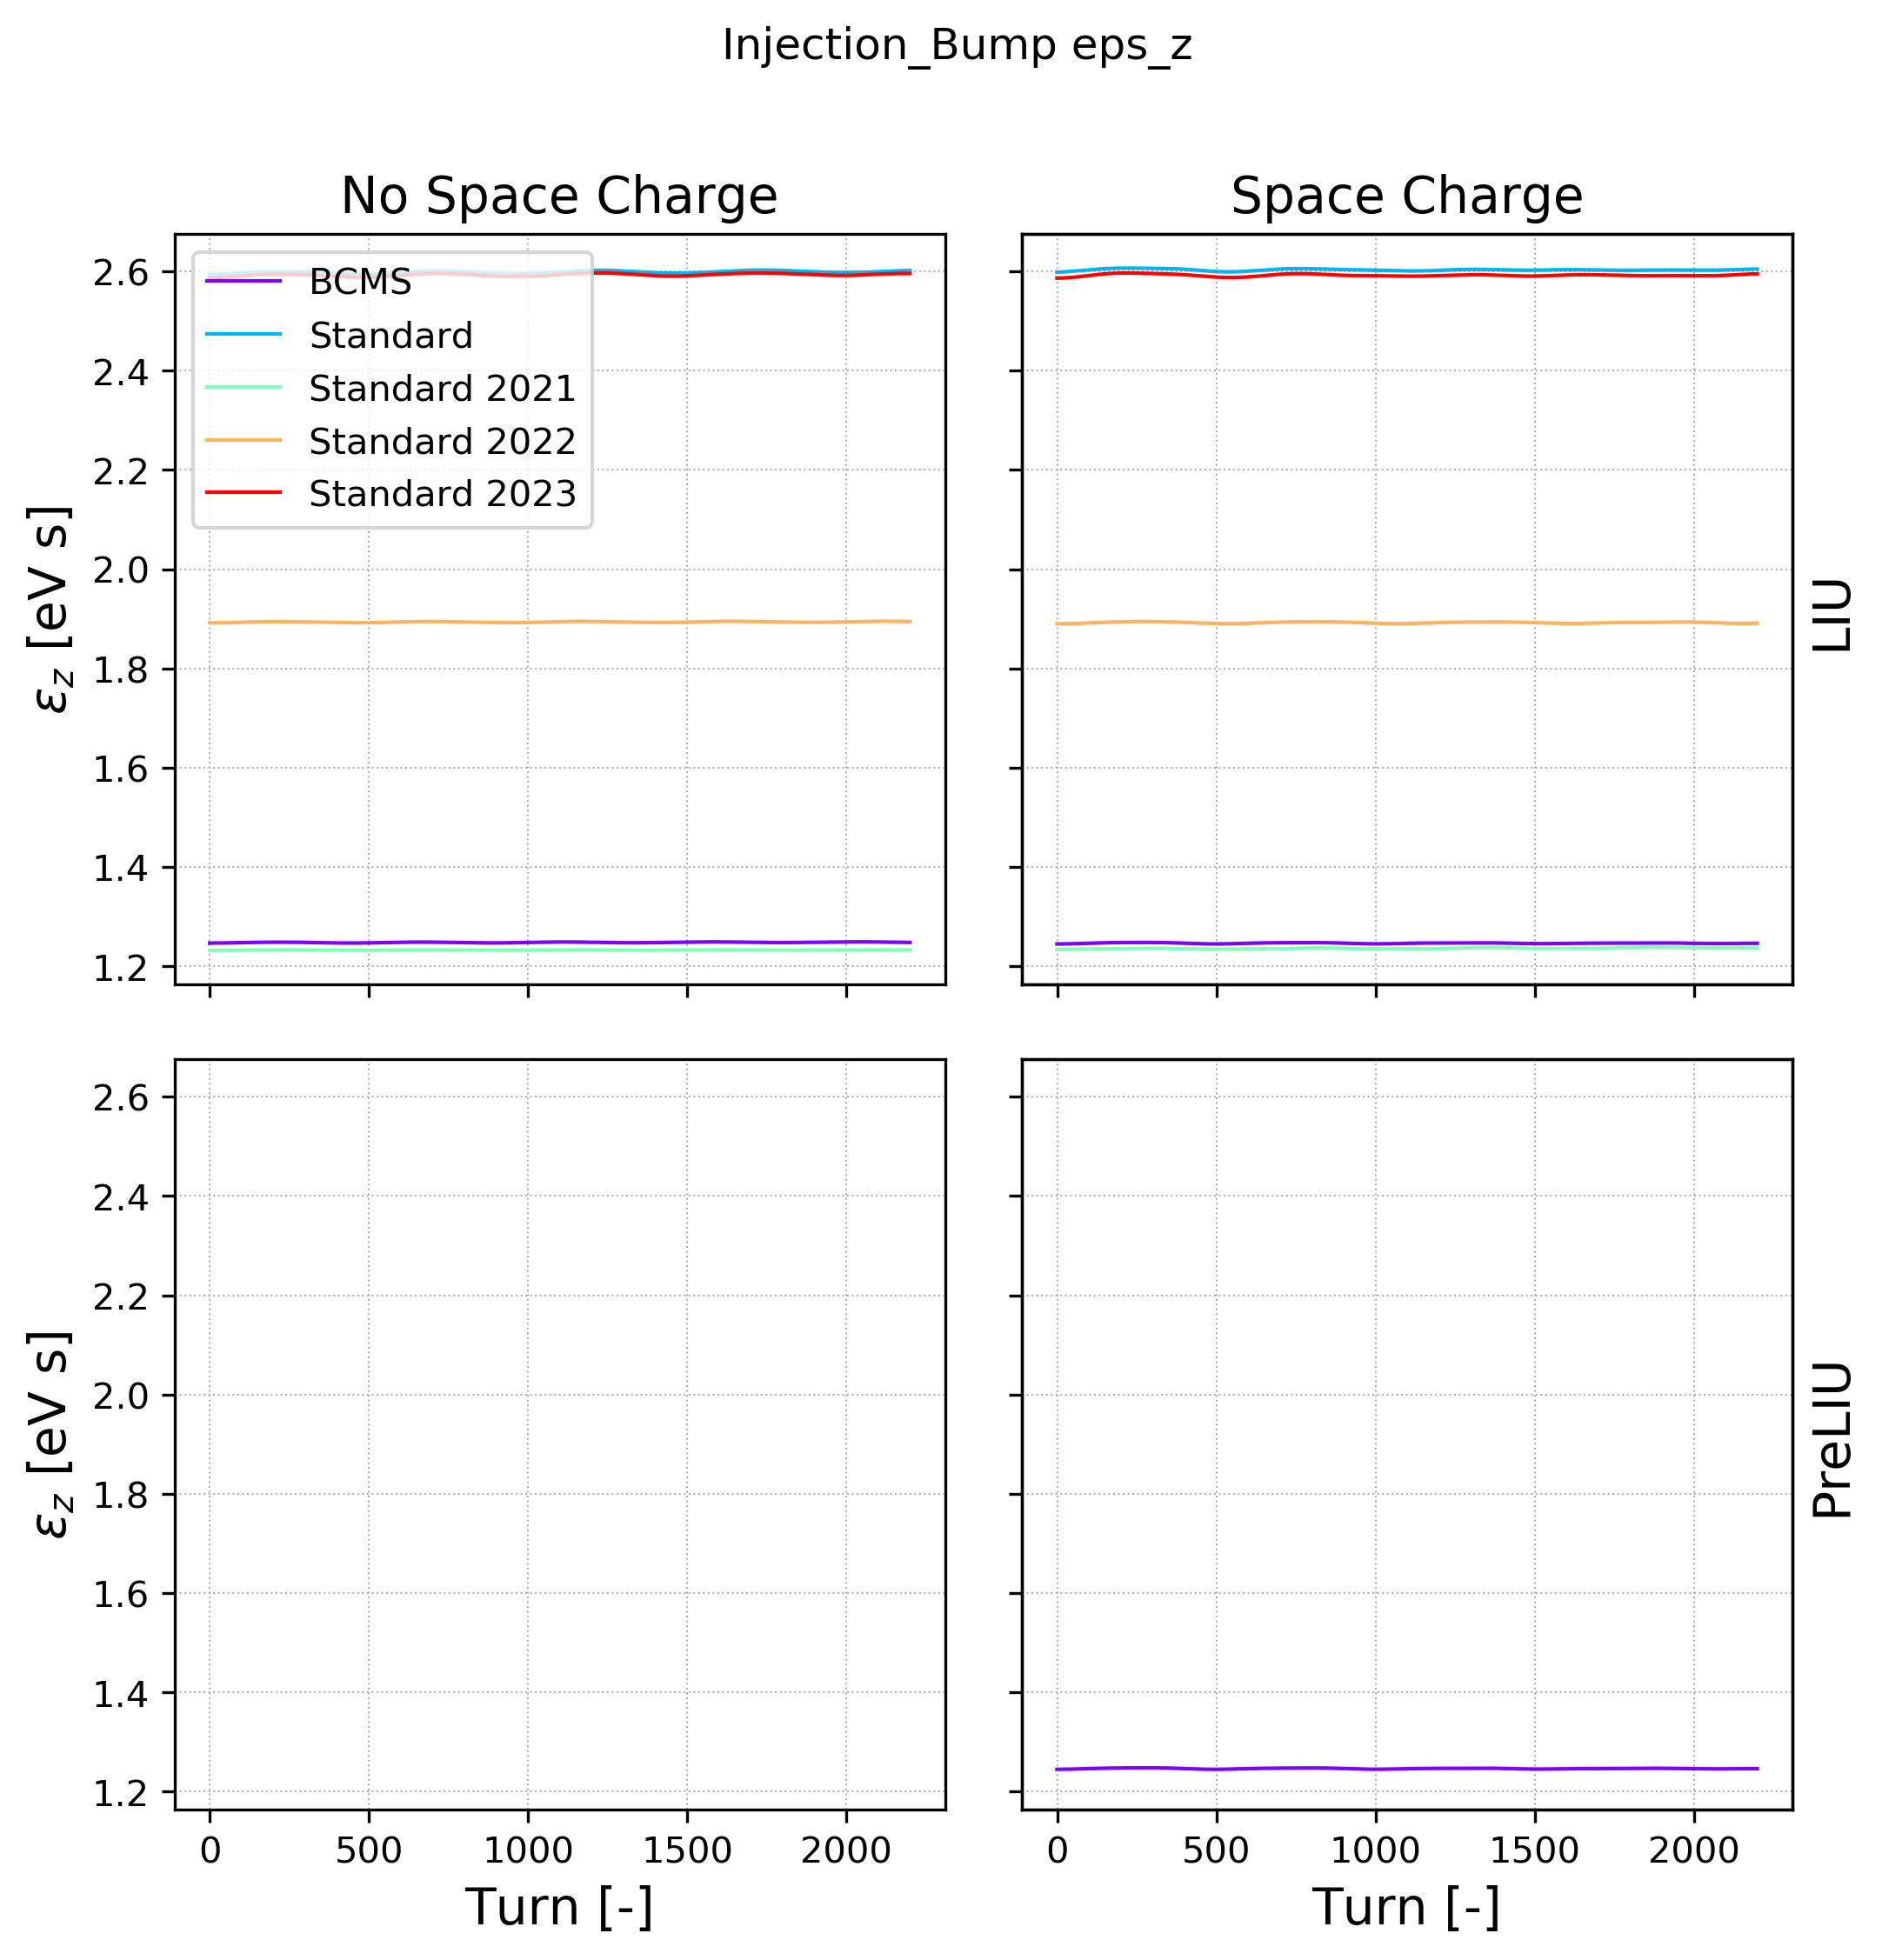

In [20]:
parameter = 'eps_z'
multi1 = 1


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_z$ [eV s]');
ax3.set_ylabel(r'$\epsilon_z$ [eV s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

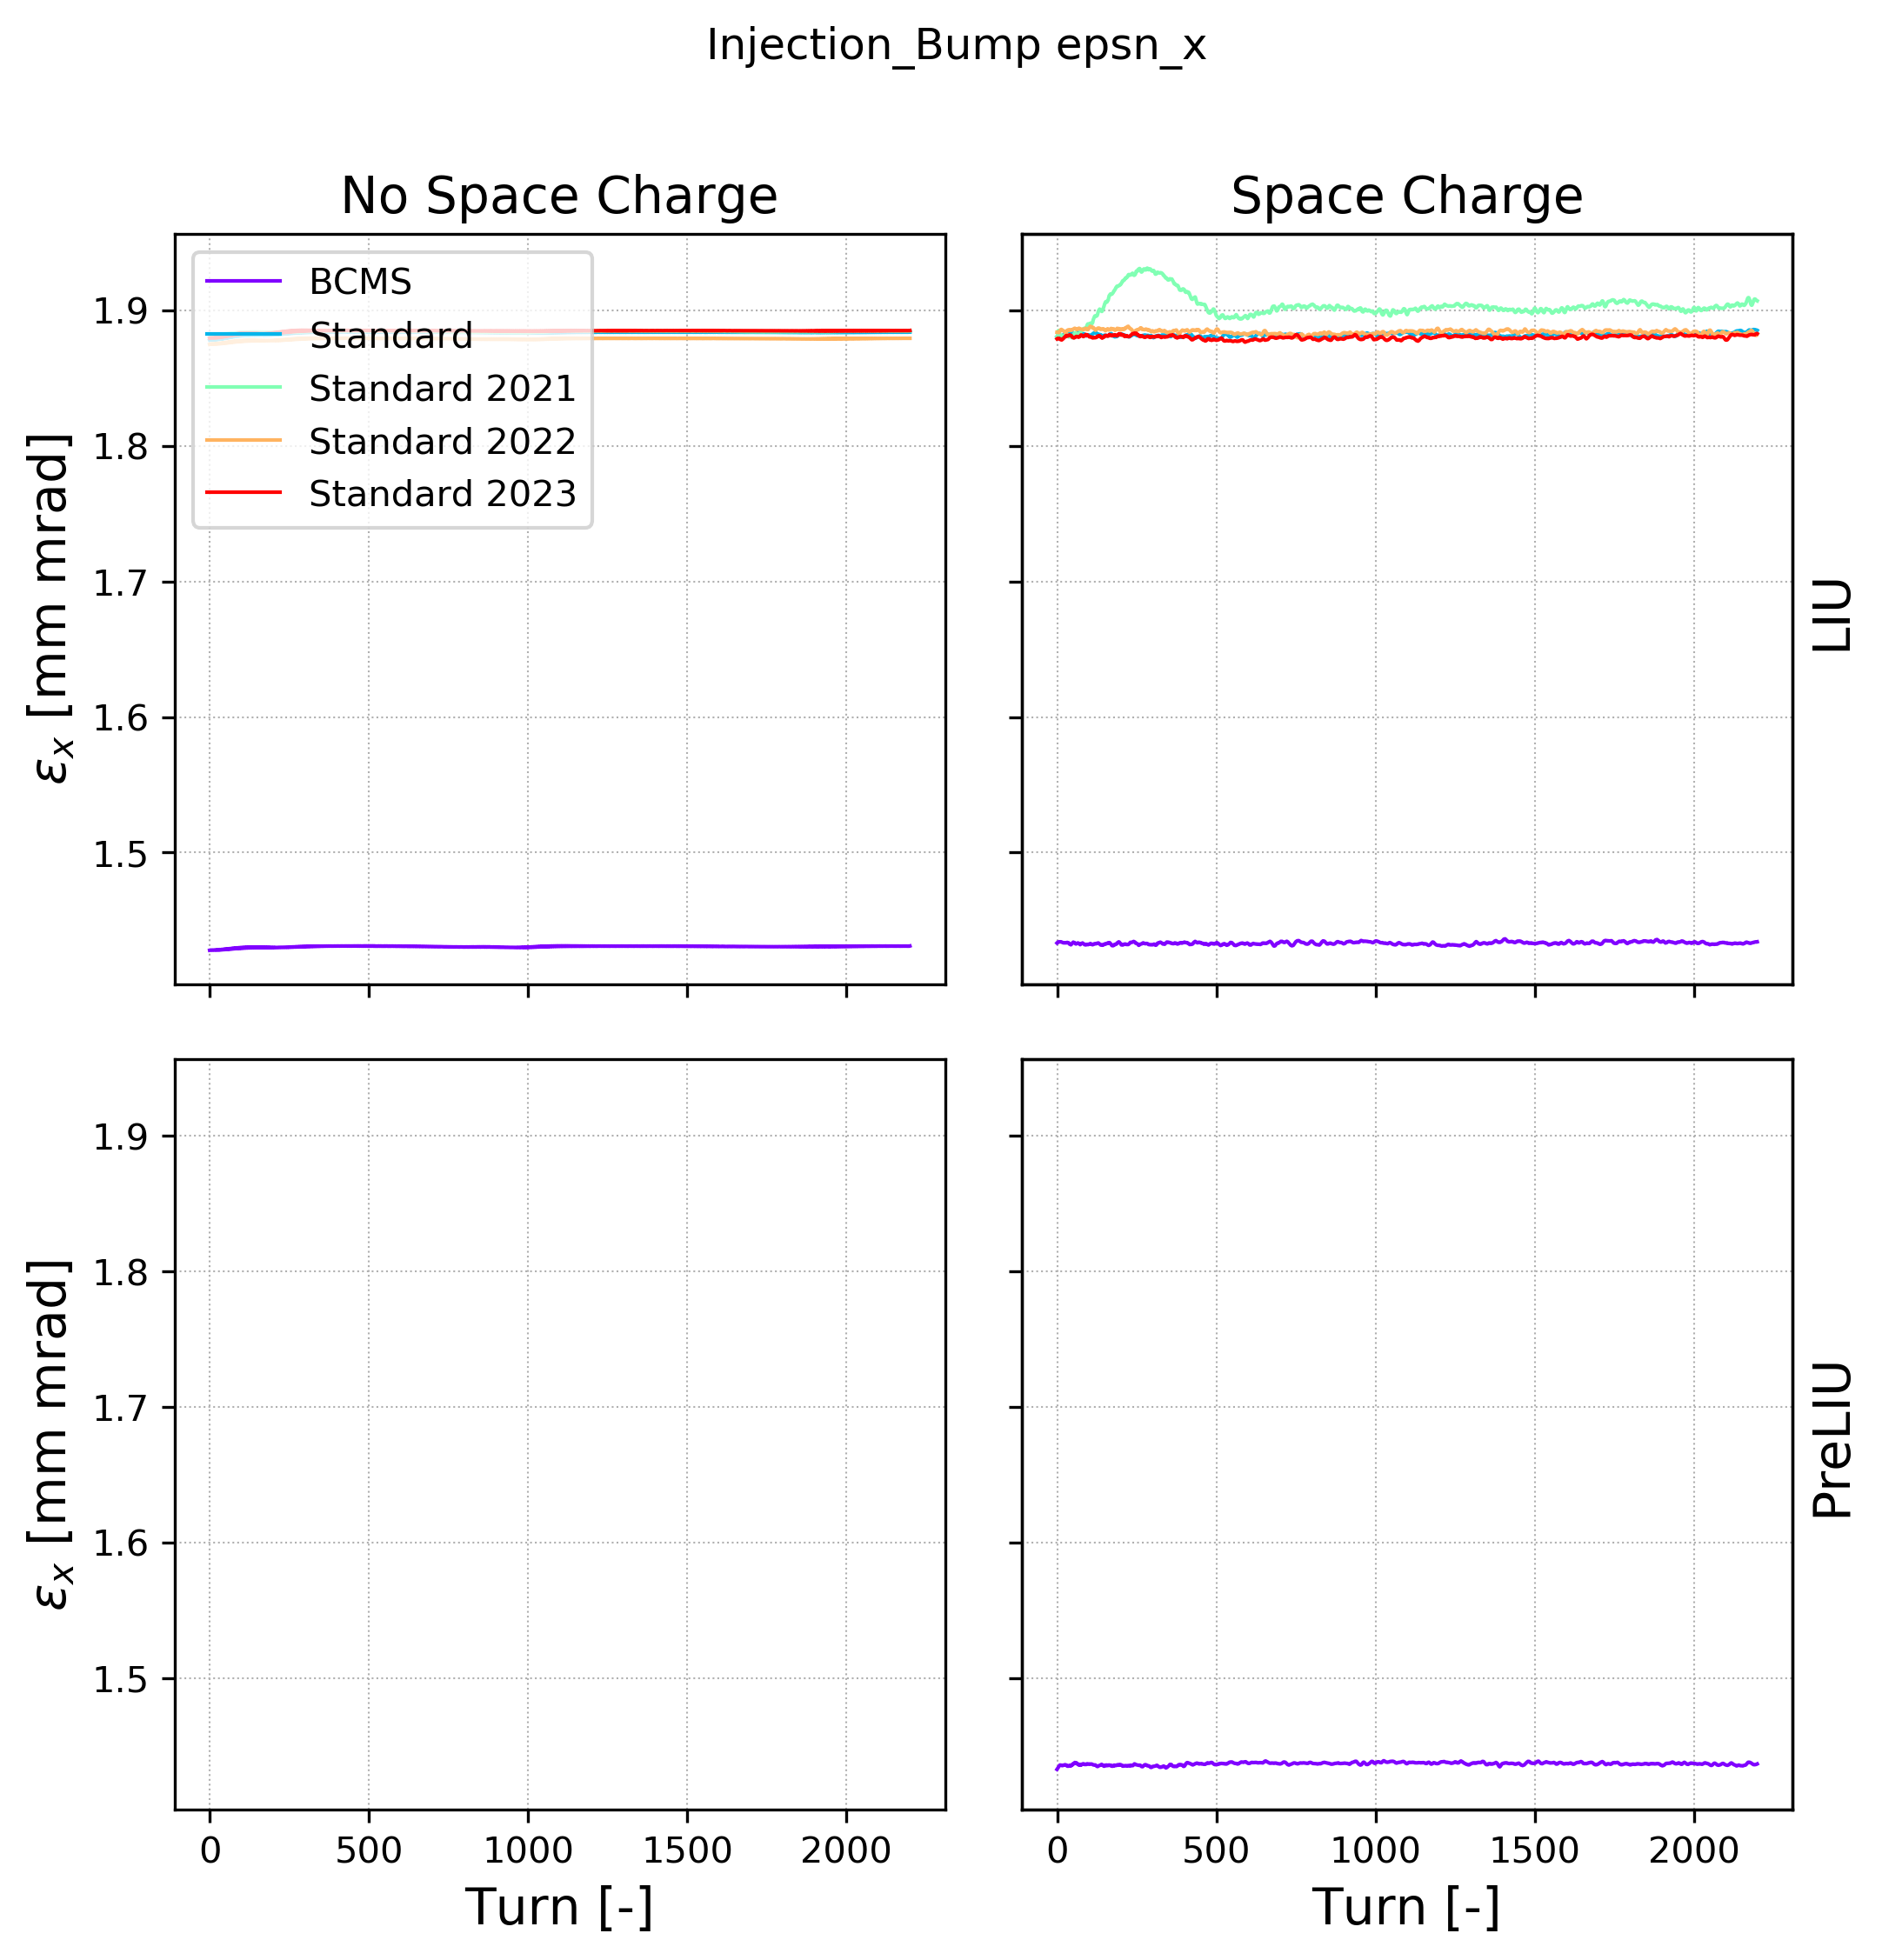

In [21]:
parameter = 'epsn_x'
multi1 = 1E6


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax3.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

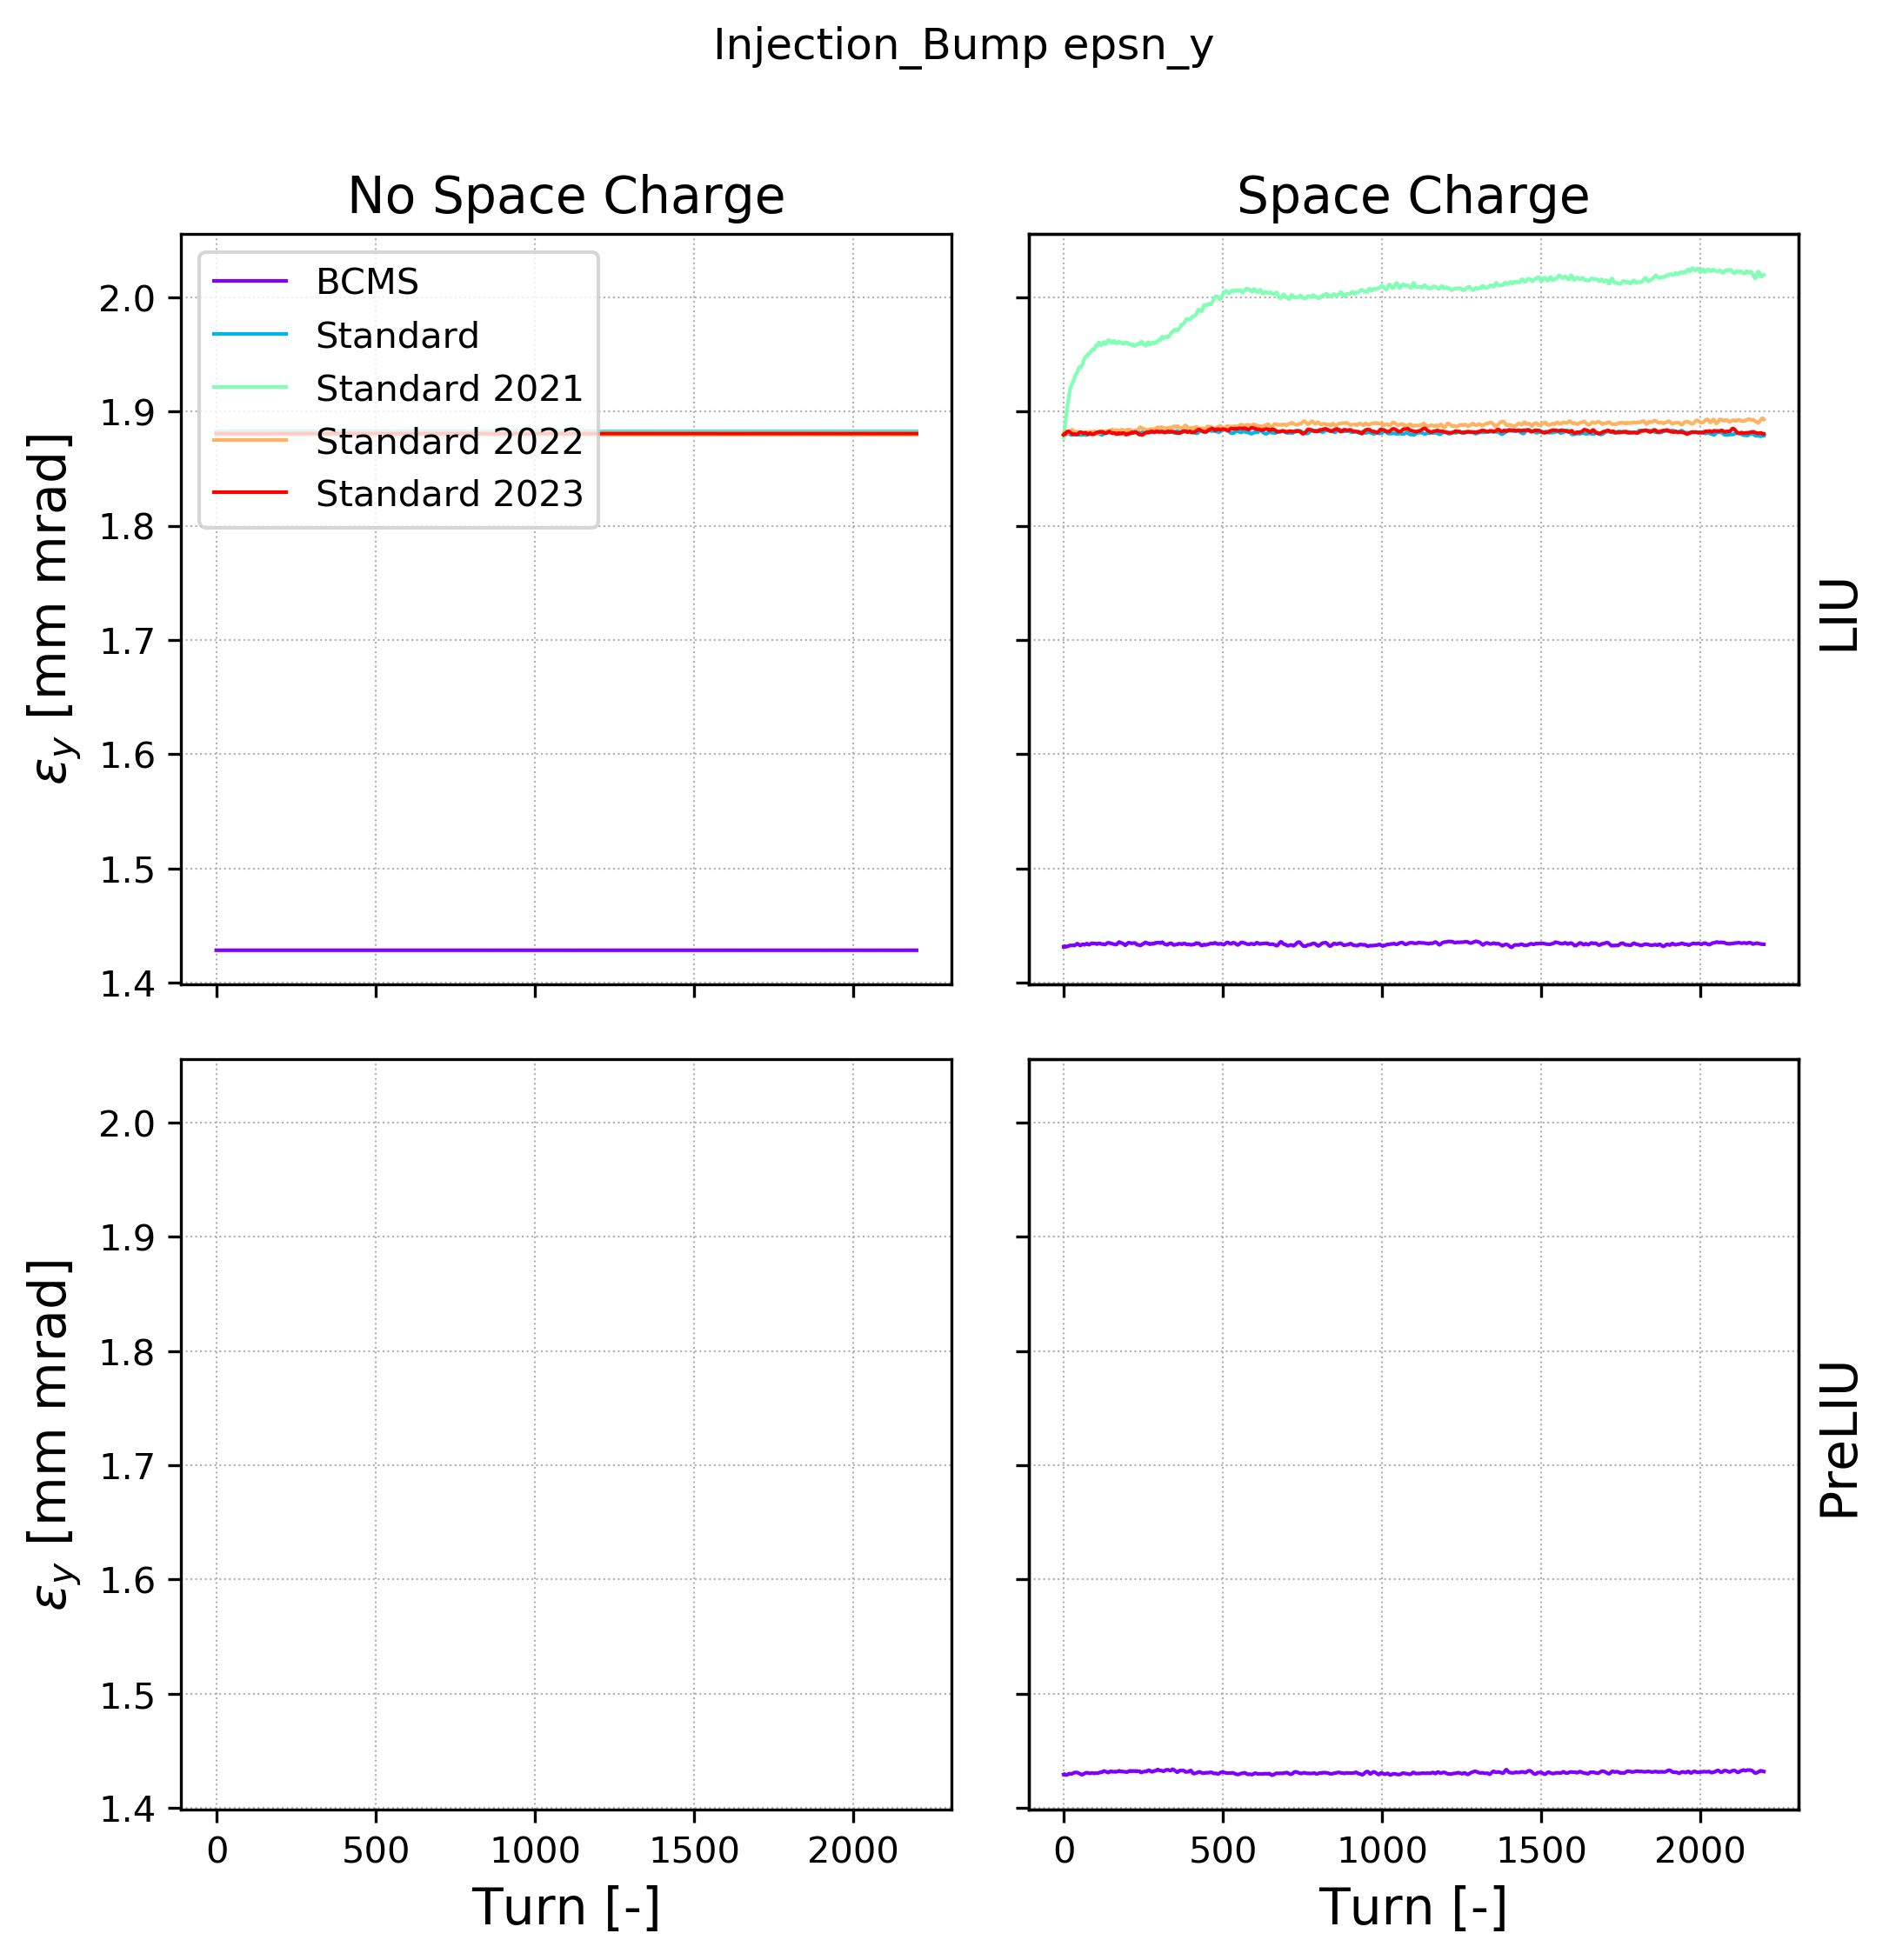

In [22]:
parameter = 'epsn_y'
multi1 = 1E6


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax3.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');
ax2.set_title('Space Charge')
ax1.set_title('No Space Charge')

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

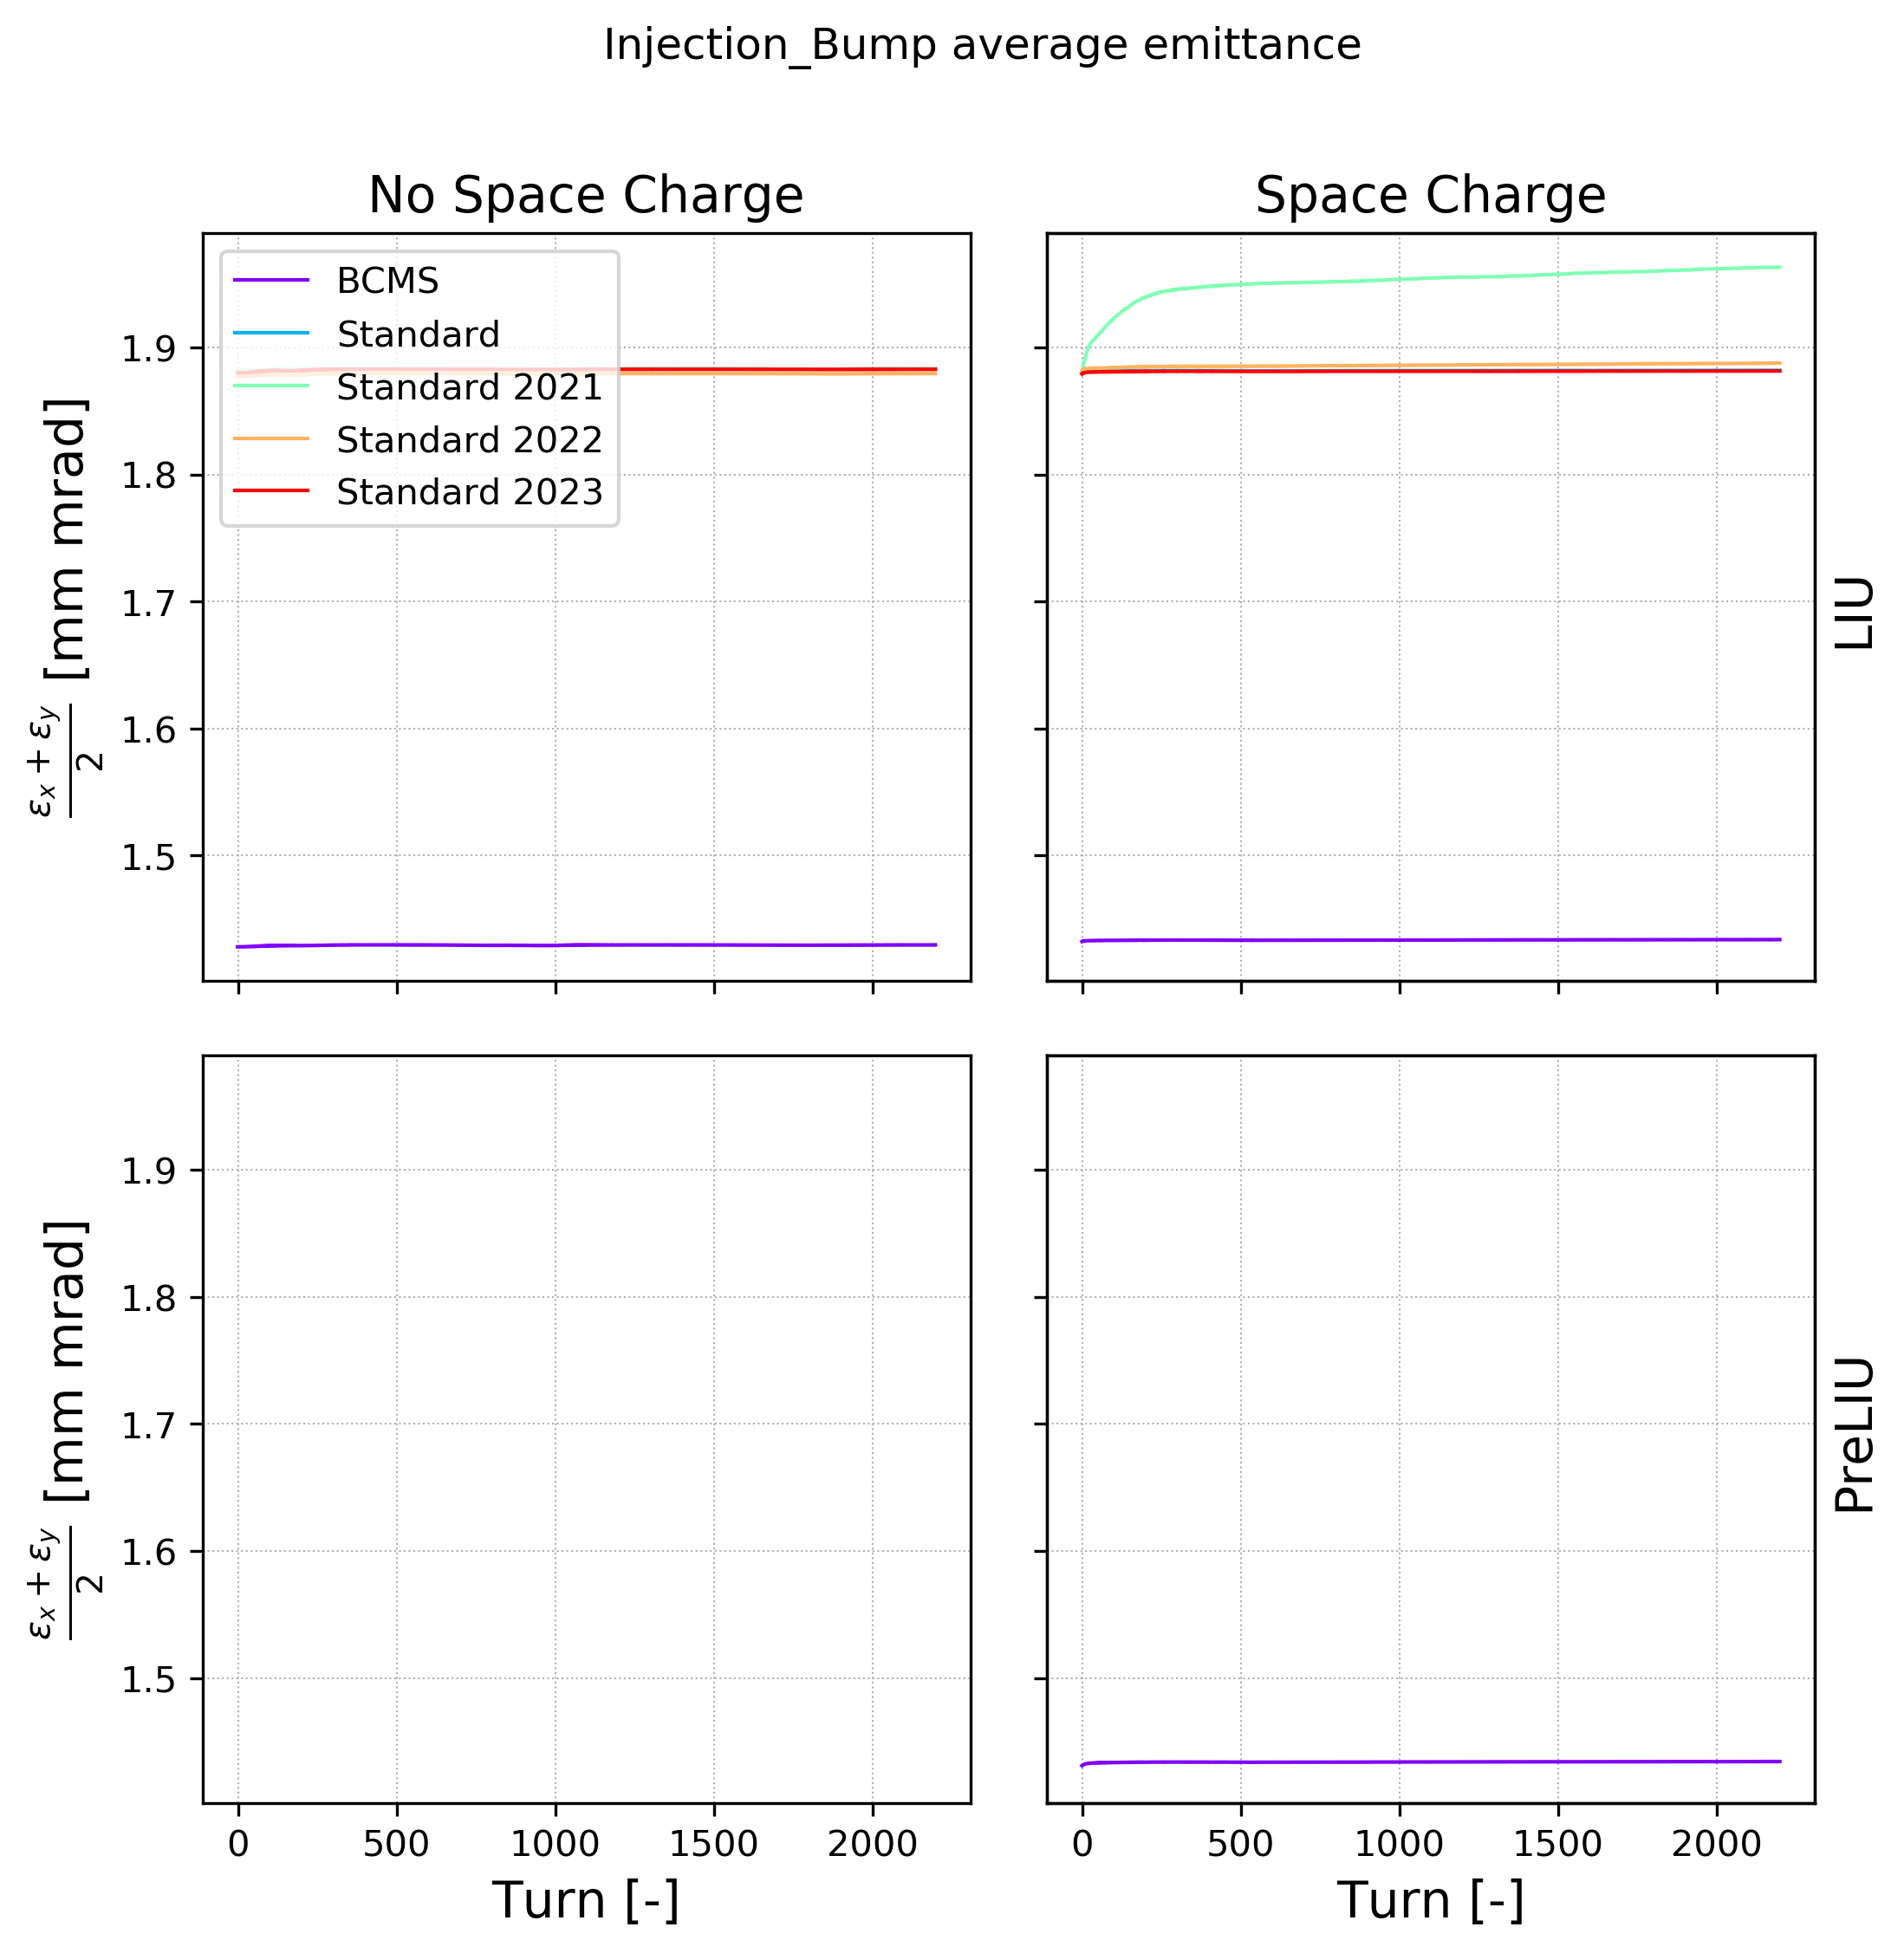

In [23]:
parameter1 = 'epsn_x'
multi1 = 1E6
parameter2 = 'epsn_y'
multi2 = 1E6

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' average emittance'
fig.suptitle(tit)

ax1.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax3.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');
ax2.set_title('Space Charge')
ax1.set_title('No Space Charge')

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], (dd1[key][parameter1][0]*multi1 + dd1[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], (dd2[key][parameter1][0]*multi1 + dd2[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], (dd3[key][parameter1][0]*multi1 + dd3[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], (dd4[key][parameter1][0]*multi1 + dd4[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_average_emittance.png'
plt.savefig(savename, dpi = 800);

# Plots for ABP-Injectors WG, IPP talks May 2020

In [210]:
dd = dict()

dd = add_input_file(dd, '02_SC_PreLIU_Standard/PyORBIT/output/output.mat', '00 Run2 Standard')
#dd = add_input_file(dd, '02_SC_PreLIU_BCMS/PyORBIT/output/output.mat', '01 Run2 BCMS')
dd = add_input_file(dd, '../02_SC/02_PreLIU_BCMS/output/output.mat', '01 Run2 BCMS')

#dd = add_input_file(dd, '02_SC_LIU_Standard/PyORBIT/output/output.mat', '02 LIU Standard')
#dd = add_input_file(dd, '02_SC_LIU_BCMS/PyORBIT/output/output.mat', '03 LIU BCMS')

dd = add_input_file(dd, '02_SC_LIU_Standard_2021/PyORBIT/output/output.mat', '04 LIU Standard 2021')
dd = add_input_file(dd, '02_SC_LIU_Standard_2022/PyORBIT/output/output.mat', '05 LIU Standard 2022')
dd = add_input_file(dd, '02_SC_LIU_Standard_2023/PyORBIT/output/output.mat', '06 LIU Standard 2023')

	Added output data from  02_SC_PreLIU_Standard/PyORBIT/output/output.mat 	 dictionary key:  00 Run2 Standard
	Added output data from  ../02_SC/02_PreLIU_BCMS/output/output.mat 	 dictionary key:  01 Run2 BCMS
	Added output data from  02_SC_LIU_Standard/PyORBIT/output/output.mat 	 dictionary key:  02 LIU Standard
	Added output data from  02_SC_LIU_BCMS/PyORBIT/output/output.mat 	 dictionary key:  03 LIU BCMS
	Added output data from  02_SC_LIU_Standard_2021/PyORBIT/output/output.mat 	 dictionary key:  04 LIU Standard 2021
	Added output data from  02_SC_LIU_Standard_2022/PyORBIT/output/output.mat 	 dictionary key:  05 LIU Standard 2022
	Added output data from  02_SC_LIU_Standard_2023/PyORBIT/output/output.mat 	 dictionary key:  06 LIU Standard 2023


In [205]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 12

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 5

00 Run2 Standard Average  epsn_x  =  2.26  range =  0.00839  =  0.372 %
01 Run2 BCMS Average  epsn_x  =  1.44  range =  0.00639  =  0.445 %
02 LIU Standard Average  epsn_x  =  1.88  range =  0.00666  =  0.354 %
03 LIU BCMS Average  epsn_x  =  1.43  range =  0.00544  =  0.38 %
04 LIU Standard 2021 Average  epsn_x  =  1.9  range =  0.0513  =  2.69 %
05 LIU Standard 2022 Average  epsn_x  =  1.88  range =  0.00846  =  0.449 %
06 LIU Standard 2023 Average  epsn_x  =  1.88  range =  0.00665  =  0.354 %


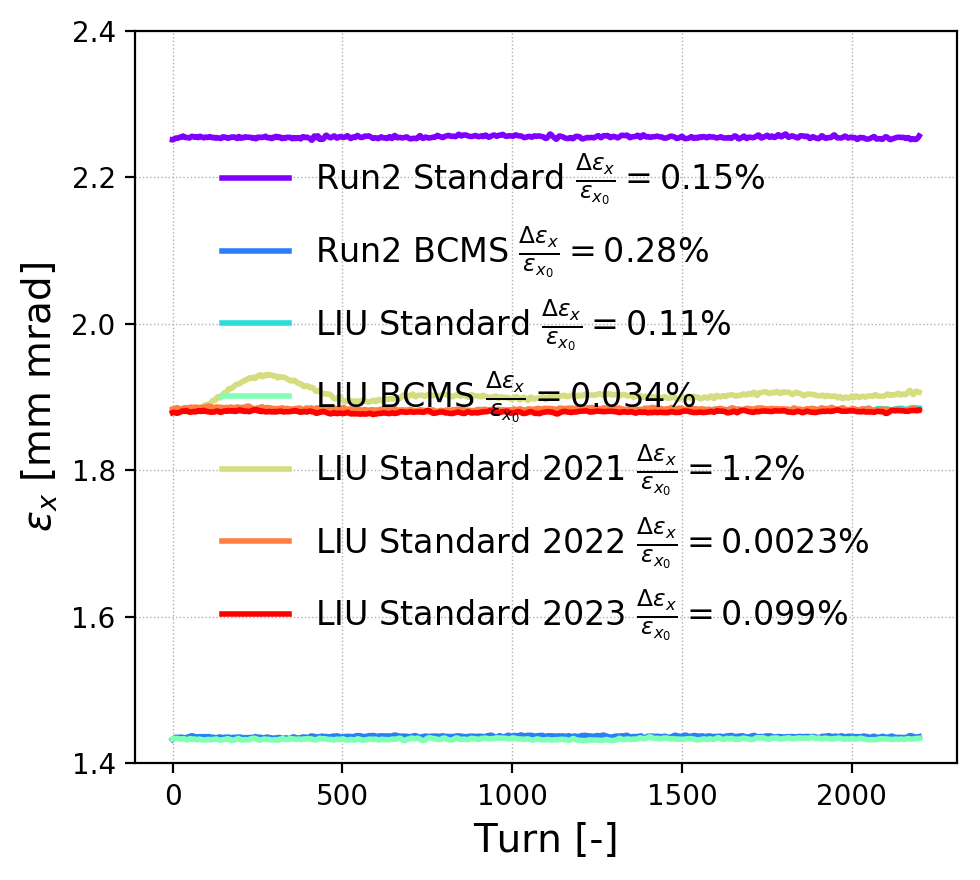

In [206]:
parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.4, 2.4)
ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

00 Run2 Standard Average  epsn_y  =  2.26  range =  0.00893  =  0.395 %
01 Run2 BCMS Average  epsn_y  =  1.43  range =  0.0052  =  0.363 %
02 LIU Standard Average  epsn_y  =  1.88  range =  0.00599  =  0.318 %
03 LIU BCMS Average  epsn_y  =  1.43  range =  0.00535  =  0.373 %
04 LIU Standard 2021 Average  epsn_y  =  2.02  range =  0.149  =  7.34 %
05 LIU Standard 2022 Average  epsn_y  =  1.89  range =  0.0146  =  0.771 %
06 LIU Standard 2023 Average  epsn_y  =  1.88  range =  0.00647  =  0.343 %


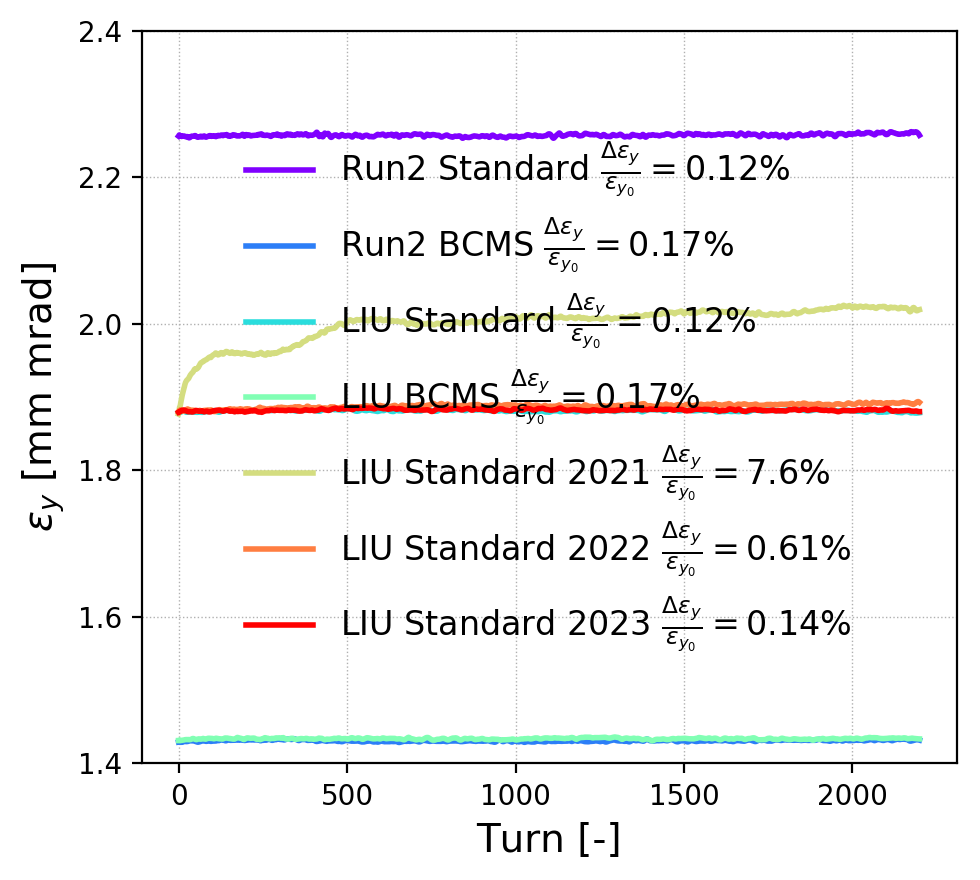

In [207]:
parameter1 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.4, 2.4)
plt.tight_layout()
fig.savefig(savename)

05 LIU Standard 2022 Average  epsn_x  =  1.88  range =  0.00846  =  0.449 %
03 LIU BCMS Average  epsn_x  =  1.43  range =  0.00544  =  0.38 %
04 LIU Standard 2021 Average  epsn_x  =  1.9  range =  0.0513  =  2.69 %
02 LIU Standard Average  epsn_x  =  1.88  range =  0.00666  =  0.354 %
01 Run2 BCMS Average  epsn_x  =  1.44  range =  0.00639  =  0.445 %
00 Run2 Standard Average  epsn_x  =  2.26  range =  0.00839  =  0.372 %


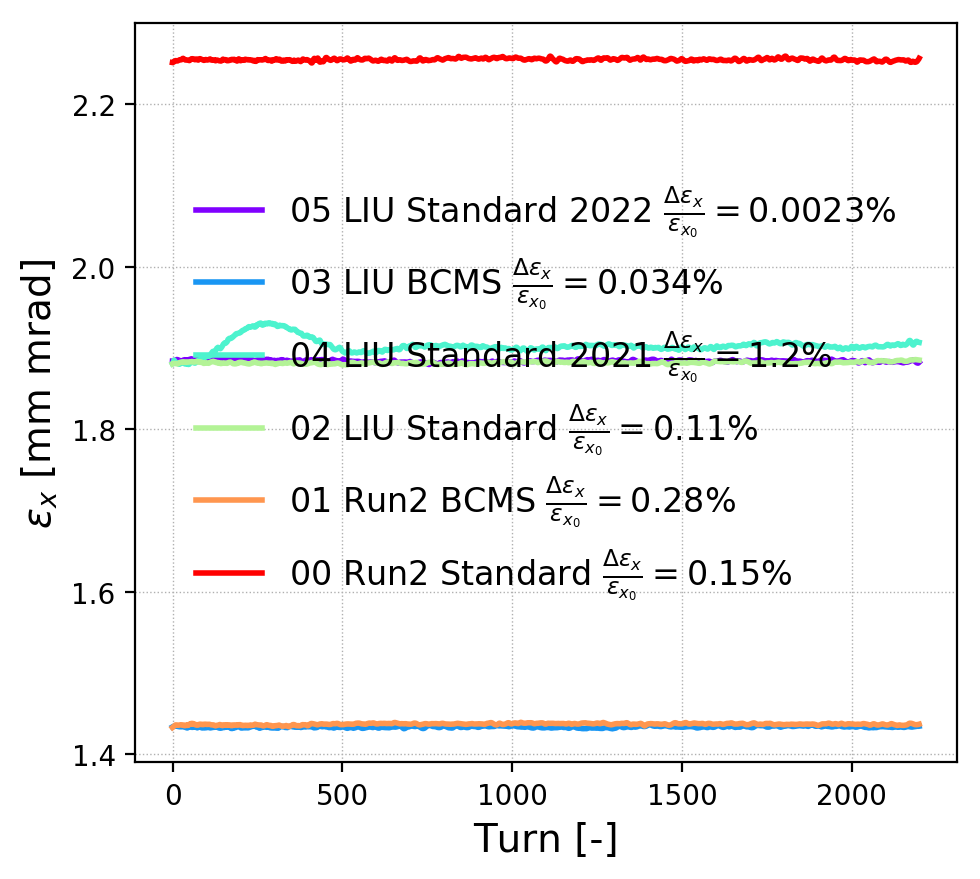

In [159]:
parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key in dd:
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

Run2 Standard Average  epsn_y  =  2.26  range =  0.00893  =  0.395 %
Run2 BCMS Average  epsn_y  =  1.43  range =  0.0052  =  0.363 %
LIU Standard Average  epsn_y  =  1.88  range =  0.00599  =  0.318 %
LIU Standard 2022 Average  epsn_y  =  1.89  range =  0.0146  =  0.771 %
LIU Standard 2023 Average  epsn_y  =  1.88  range =  0.00647  =  0.343 %
LIU Standard 2021 Average  epsn_y  =  2.02  range =  0.149  =  7.34 %
LIU BCMS Average  epsn_y  =  1.43  range =  0.00535  =  0.373 %


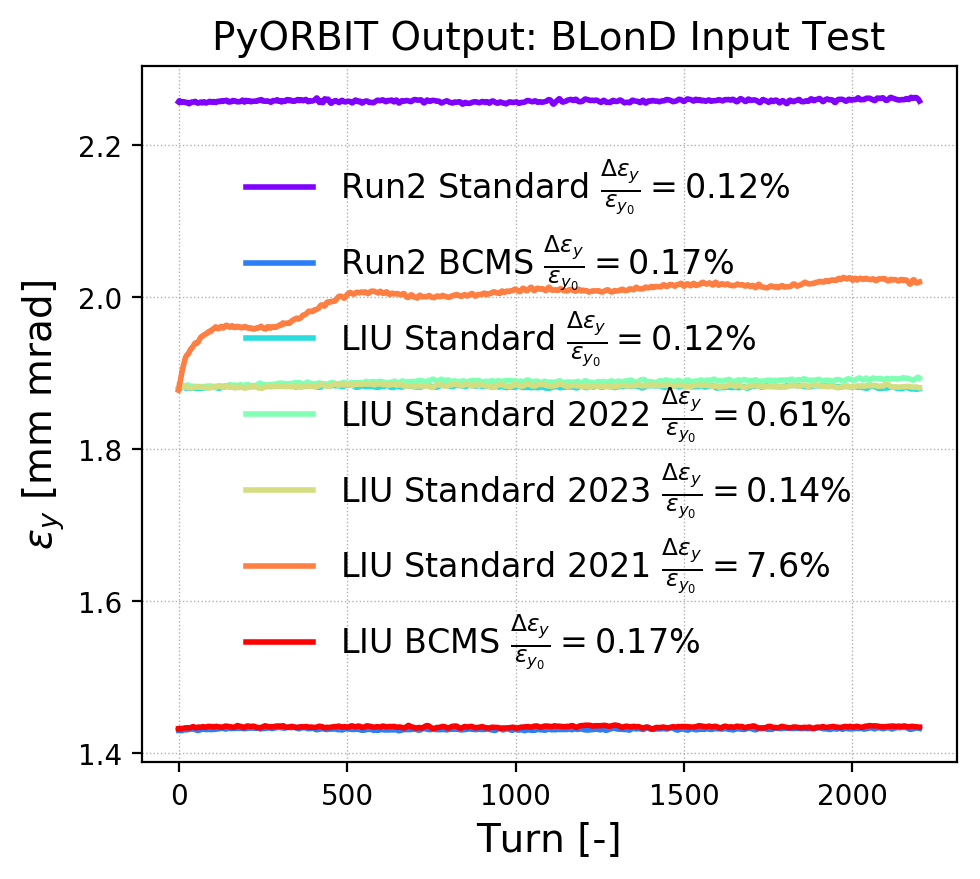

In [64]:
parameter1 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key in dd:
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

Run2 Standard Average  bunchlength  =  172.0  range =  9.37  =  5.44 %
Run2 BCMS Average  bunchlength  =  122.0  range =  4.48  =  3.66 %
LIU Standard Average  bunchlength  =  190.0  range =  5.25  =  2.77 %
LIU Standard 2022 Average  bunchlength  =  155.0  range =  5.62  =  3.62 %
LIU Standard 2023 Average  bunchlength  =  190.0  range =  5.4  =  2.85 %
LIU Standard 2021 Average  bunchlength  =  126.0  range =  13.2  =  10.5 %
LIU BCMS Average  bunchlength  =  122.0  range =  4.37  =  3.57 %


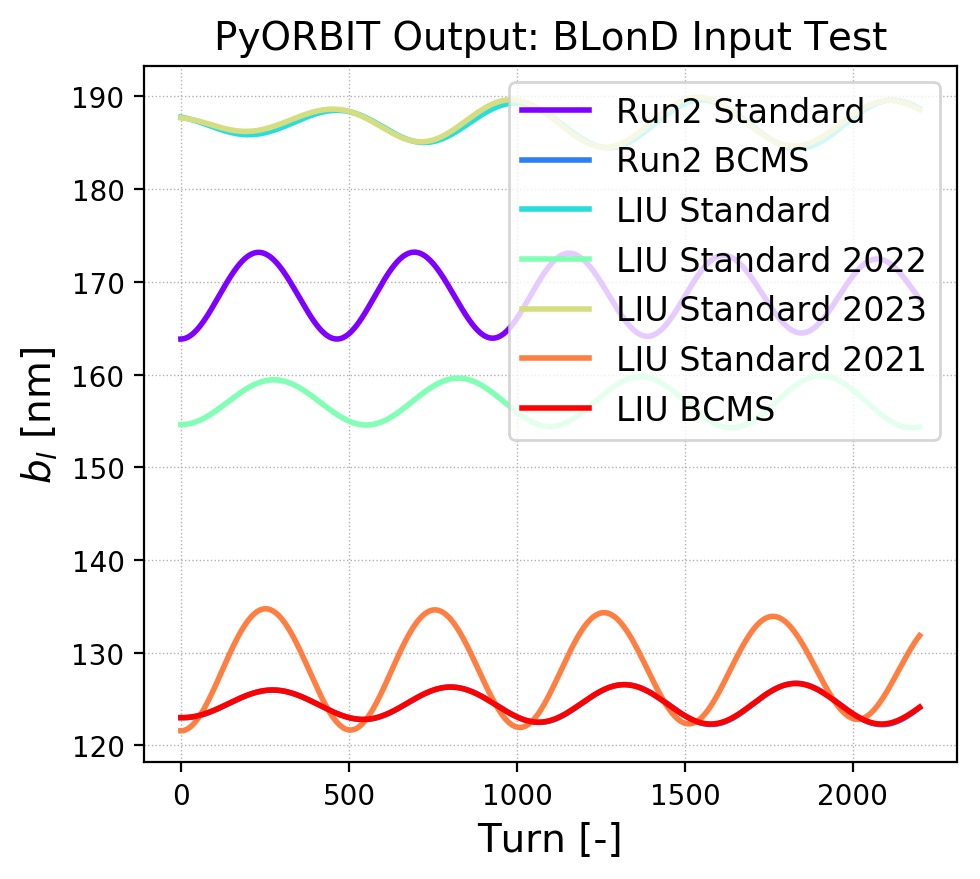

In [65]:
parameter1 = 'bunchlength'
multi1 = 1E9

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel('$b_l$ [nm]')


colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key in dd:

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=key);
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)